In [1]:
!pip install psycopg2
import psycopg2 as psycopg2
import pandas as pd
from sklearn import preprocessing

In [2]:
host = "np-ado-asg2-jairzhou.postgres.database.azure.com"
port = 5432
dbname = "postgres"
username = "admin1@np-ado-asg2-jairzhou"
pwd = "jair_zhou1"

table = "insurance_churn"

In [3]:
with psycopg2.connect("host='{}' port={} dbname='{}' user={} password={}".format(host, port, dbname, username, pwd)) as conn:
    sql = "select * from {};".format(table)
    df = pd.read_sql_query(sql, conn)

C:\Users\ethan\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [4]:
df.head()

,bmi,churn,Unnamed: 0,Claim Amount,Claim Reason,Company Name,Customer Name,Category Premium,customer_address,Claim Request output,Data confidentiality,Premium/Amount Ratio,_airbyte_ab_id,_airbyte_emitted_at,_airbyte_normalized_at,_airbyte_insurance_churn_hashid
0,21,Yes,0,377,Travel,"Williams, Henderson and Perez",Christine Payne,4794,"7627 Anderson Rest Apt. 265,Lake Heather, DC 3...",No,Low,0.0786399666249478,a4834632-65bd-435c-93c6-b283ffe30a84,2023-01-24 09:13:06+00:00,2023-01-24 09:14:19.189426+00:00,bc857da57a1aa8c345bec3ad96b8e6f8
1,24,Yes,1,1440,Medical,Moore-Goodwin,Tony Fernandez,14390,"3953 Cindy Brook Apt. 147,East Lindatown, TN 4...",No,High,0.1000694927032661,ee3716ed-c3e5-4095-af7e-a14d4d77bf43,2023-01-24 09:13:06+00:00,2023-01-24 09:14:19.189426+00:00,20d7f88a4307e673d8f71eec5da176ba
2,18,Yes,2,256,Phone,Smith-Holmes,Christopher Kim,1875,"8693 Walters Mountains,South Tony, TX 88407",No,Medium,0.1365333333333333,5b515be0-de75-4dc6-ad8e-65e6ff022bcf,2023-01-24 09:13:06+00:00,2023-01-24 09:14:19.189426+00:00,72dca992e1d58547b50f5f990a7444cc
3,24,Yes,3,233,Phone,Harrell-Perez,Nicole Allen,1875,"56926 Webster Coves,Shawnmouth, NV 04853",No,Medium,0.1242666666666666,96a1fe79-de08-42ce-b8c5-5a2e709ae514,2023-01-24 09:13:06+00:00,2023-01-24 09:14:19.189426+00:00,579672ac495bece9469c382dc77d6b35
4,21,Yes,4,239,Phone,"Simpson, Kramer and Hughes",Linda Cruz,1875,"489 Thomas Forges Apt. 305,Jesseton, GA 36765",No,Medium,0.1274666666666666,748ac0b4-f2e5-4c15-a196-eaa8d5ce073d,2023-01-24 09:13:06+00:00,2023-01-24 09:14:19.189426+00:00,142f7632b64f57f7d888986ffa9bc975


In [5]:
# drop irrelevant data
df.drop(list(df.filter(regex = '_airbyte_')), axis = 1, inplace = True)
df.head()

,bmi,churn,Unnamed: 0,Claim Amount,Claim Reason,Company Name,Customer Name,Category Premium,customer_address,Claim Request output,Data confidentiality,Premium/Amount Ratio
0,21,Yes,0,377,Travel,"Williams, Henderson and Perez",Christine Payne,4794,"7627 Anderson Rest Apt. 265,Lake Heather, DC 3...",No,Low,0.0786399666249478
1,24,Yes,1,1440,Medical,Moore-Goodwin,Tony Fernandez,14390,"3953 Cindy Brook Apt. 147,East Lindatown, TN 4...",No,High,0.1000694927032661
2,18,Yes,2,256,Phone,Smith-Holmes,Christopher Kim,1875,"8693 Walters Mountains,South Tony, TX 88407",No,Medium,0.1365333333333333
3,24,Yes,3,233,Phone,Harrell-Perez,Nicole Allen,1875,"56926 Webster Coves,Shawnmouth, NV 04853",No,Medium,0.1242666666666666
4,21,Yes,4,239,Phone,"Simpson, Kramer and Hughes",Linda Cruz,1875,"489 Thomas Forges Apt. 305,Jesseton, GA 36765",No,Medium,0.1274666666666666


In [6]:
df.isnull().sum()

bmi                     0
churn                   0
Unnamed: 0              0
Claim Amount            0
Claim Reason            0
Company Name            0
Customer Name           0
Category Premium        0
customer_address        0
Claim Request output    0
Data confidentiality    0
Premium/Amount Ratio    0
dtype: int64

In [7]:
df.nunique()

bmi                         11
churn                        2
Unnamed: 0              200000
Claim Amount              1769
Claim Reason                 4
Company Name            127489
Customer Name           120428
Category Premium             4
customer_address        200000
Claim Request output         2
Data confidentiality         4
Premium/Amount Ratio      1769
dtype: int64

In [8]:
# as of now fill all NaNs w/ 0
df = df.fillna(0)
df = df.drop(columns = ["Unnamed: 0","Customer Name","Company Name"])

In [9]:
df.head()

,bmi,churn,Claim Amount,Claim Reason,Category Premium,customer_address,Claim Request output,Data confidentiality,Premium/Amount Ratio
0,21,Yes,377,Travel,4794,"7627 Anderson Rest Apt. 265,Lake Heather, DC 3...",No,Low,0.0786399666249478
1,24,Yes,1440,Medical,14390,"3953 Cindy Brook Apt. 147,East Lindatown, TN 4...",No,High,0.1000694927032661
2,18,Yes,256,Phone,1875,"8693 Walters Mountains,South Tony, TX 88407",No,Medium,0.1365333333333333
3,24,Yes,233,Phone,1875,"56926 Webster Coves,Shawnmouth, NV 04853",No,Medium,0.1242666666666666
4,21,Yes,239,Phone,1875,"489 Thomas Forges Apt. 305,Jesseton, GA 36765",No,Medium,0.1274666666666666


In [10]:
for x in range(0,len(df)):  
    splitlist = df["customer_address"][x].split(",")
    if len(splitlist) ==2:
        df["customer_address"][x] = splitlist[1][0:3]
    else:
        df["customer_address"][x] = splitlist[2][0:3]
        
   
    print(df["customer_address"][x])
   

 DC
 TN
 TX
 NV
 GA
FPO
 AZ
 NC
 FL
 RI
 NV
 VA
 ME
 CA
 PA
 SD
 OH
 LA
 VT
 NV
 DC
 NV
 GA
FPO
 PA
 OH
 ME
 KS
 ID
 AL
 MD
 MD
 OK
 RI
 SC
 AL
 NE
FPO
 ME
 IN
 AR
 AL
DPO
 MI
APO
DPO
 ME
 NE
 AR
 NJ
 IN
 IN
FPO
 WV
APO
 AZ
 WA
 CT
APO
 WA
 VA
 NE
 ME
 AL
 OR
 MT
 SC
 VA
 VA
 MO
 AK
APO
 OR
 CT
DPO
 FL
 WV
DPO
FPO
 MA
 UT
 IL
 CT
 NH
 MA
 CA
 SD
 PA
 NV
 MA
 AR
 WA
 MA
 WY
FPO
 NE
 IA
 WY
 SD
 GA
FPO
 VT
 DE
DPO
 SD
APO
 AZ
 MN
 CA
 IA
 AR
 LA
 MA
 AK
 AL
 TN
 OR
APO
 WA
 WY
 WA
 RI
 LA
 MO
 MN
 WY
 WA
 MT
 TX
 NY
 OH
 LA
 AZ
 MT
 WY
 AZ
 MA
 MD
 MO
 ID
 NC
 DC
 IN
 TX
 MN
 OK
 TX
 AZ
 IA
 SD
 MS
 ME
 IA
 WA
 MA
DPO
 ND
 MT
 MD
 AL
 CT
 GA
 NJ
 UT
 VT
 MA
 LA
 MD
 CA
 WY
FPO
 NH
 ND
 VT
 IL
 IN
DPO
DPO
 MO
DPO
 DE
 NV
 MN
 NH
APO
 UT
 NM
 CO
 AL
 ID
 UT
 CO
 ND
 VT
 KY
 MI
 IL
 LA
 GA
 NC
 CO
 LA
 TX
 DC
 SC
 MT
DPO
 IN
 WI
 CA
 IN
 NE
 OK
FPO
 WA
 AR
 FL
 KS
 AK
 WV
 PA
 CO
 MD
 TN
 IA
 WA
 UT
 MN
 CO
 NV
 WA
 AL
FPO
DPO
 IL
 WY
 NE
 OR
 KY
DPO
 WI
FPO
 IL
 CO
FPO
 AK
 TX
 CA
 ME
 CA


 FL
 WA
 NV
 KY
FPO
 TX
 WI
 NC
 HI
 CA
 NV
 DE
 WI
 TX
 ID
 DC
APO
DPO
 MN
 WV
 AR
 ID
 NV
 HI
 WA
 OK
 MI
 AZ
 PA
 MI
FPO
 CO
 KS
 PA
 OK
 NJ
 MO
 WA
 NV
 OK
DPO
 OK
 MD
 OK
 SC
 TX
 MI
 WY
 CO
 LA
 CA
 OK
 OH
 MD
 FL
 ID
 WV
FPO
 SC
 MT
 MN
 WY
 MA
 UT
 MT
DPO
 KS
 AK
 OH
 MN
 DC
 UT
APO
 ME
 KY
 HI
 DC
 NJ
 SD
 DE
 CO
 OH
 IL
 LA
 KY
 NC
DPO
 WI
 IA
 MO
 MO
 OR
 WI
 UT
APO
 TN
APO
 VT
 LA
 AR
 ME
 CT
 MT
 AK
 IN
 DC
 VA
 NE
 IN
 RI
 CO
 WA
 NV
 HI
 ND
 ME
 IA
 OH
APO
 LA
 ND
 NJ
 MN
 TX
 IN
APO
 DC
 SD
 OH
 NV
 NJ
 KS
 SC
 AR
 PA
 HI
 AK
APO
 NV
 ND
 TX
 KS
 NM
 OK
 WI
 MN
 WY
 PA
 MS
 WY
 KS
 DC
 IN
 KY
 IL
 KY
 AR
 GA
APO
 FL
 KS
 AR
 KS
 KS
FPO
 IN
 UT
 MO
 WV
 NH
 KY
 OR
 IL
 RI
 MD
 NY
 HI
 KY
 IL
 MO
 MA
 MN
 CT
 GA
 VA
 DC
 DE
 RI
 IN
 DE
 FL
 ND
 FL
 IN
 WA
APO
 MD
 RI
 AL
 WV
 WA
 FL
 KS
DPO
 MI
 VA
 SC
 NV
 MN
 RI
 ID
 ME
 SD
FPO
 MI
 SD
 TX
 RI
 NC
 IL
 WY
 VT
 IL
 CT
 TN
 HI
 AK
 CT
 CA
 NH
APO
 OR
DPO
 OH
APO
 SD
DPO
 DE
 WV
 IL
 OK
 WV
 UT
 CA
FPO
 LA
 TN
 PA
 KS
DPO


 MO
 AR
FPO
 TN
 MI
 HI
 WI
 WI
FPO
 TX
 ND
 MO
 TX
 NM
 KY
 MI
 CT
APO
 AK
 MD
 KY
 DC
 WV
 TX
 KY
 CO
 RI
 OH
 HI
 TX
 AL
 NV
 WY
 WY
 NV
 HI
 NJ
 NE
 WI
FPO
DPO
 MN
 WY
 MA
 KS
 MD
 OK
 TN
 NC
 UT
 MA
 NM
 CO
 WA
 CO
 IA
 MO
 OK
 MD
 NV
 WY
 LA
 ND
 AK
 CT
 NV
 OK
 MT
 NE
APO
 NH
FPO
 FL
 AR
 IA
 AR
 DC
 TN
 SD
 ME
 KY
FPO
 NM
 CO
APO
 HI
 NJ
 MI
 TX
 NJ
 NJ
 WV
 AK
 SD
 NJ
 IL
 OH
 UT
 MO
 RI
 WI
 TN
APO
 NY
 HI
 CA
 AL
 OR
 CT
 IA
 AZ
 IN
 TX
 IN
FPO
 OK
 SD
 AR
 NJ
 MN
 GA
APO
 NC
 OH
 SD
 CA
 NH
 DE
 OH
FPO
 HI
FPO
 MI
 KS
 MO
 SD
 MN
 NV
FPO
 MI
 MN
 CA
 MD
 MN
FPO
 NY
FPO
 DC
FPO
 PA
 NY
 MT
 WI
 MS
 MO
 CT
 NJ
 ID
 WV
 GA
 KS
FPO
 CO
 NH
 KY
 KS
FPO
FPO
 ME
 ID
 MS
 OH
APO
 MS
 NC
 TN
FPO
 CA
 NE
 NV
 VA
 IA
 CO
 LA
 RI
 KY
 NH
 AR
 UT
 MT
 CT
 NV
 IN
 OK
 GA
 SD
 RI
 SD
 LA
 HI
 ID
 IN
 AZ
FPO
 MS
 AZ
 IN
APO
APO
 MA
 ID
 DC
 WY
 KS
 AK
 HI
 MD
 UT
 MD
 UT
 RI
 MO
 AL
 NY
 IN
 NE
 IA
FPO
 AR
 DE
 DE
 SC
 VT
 WY
 MD
 NY
 WA
DPO
 ME
 ND
 FL
 MS
 IA
 MO
 ME
 FL
APO
 UT
 SC
 ID


 DC
 KS
 WY
 MI
FPO
 NC
 PA
 AL
 VT
 MN
 ID
 KS
 DC
 UT
 MA
 AL
 WY
 PA
 NY
 NC
FPO
 HI
 CT
 DC
 FL
 NJ
 HI
 ID
 OK
 MA
 CT
 WI
 ND
 HI
 AR
 NE
 SD
 CT
 WA
 MA
 MN
 ND
 WA
FPO
 SD
 WY
 ID
 WA
 NV
DPO
 HI
 NM
APO
 OR
 OH
FPO
 DC
DPO
 FL
 OH
 GA
 NC
 WY
 VT
 MT
 WI
 KY
 UT
 IN
 RI
 SC
DPO
 OR
 TX
 PA
 WV
 VT
 MI
 NV
APO
 NV
DPO
 HI
 RI
 TN
 MN
 IL
 VT
 KS
 LA
 WI
 NY
 MD
DPO
 MN
 MD
 ME
 NJ
 MA
 MD
FPO
APO
APO
 CA
 KY
DPO
 GA
 DC
DPO
 HI
 UT
DPO
DPO
 AL
 ME
FPO
 IN
 DC
 LA
FPO
 MN
 MD
 WI
 NY
 NE
 AL
 MI
 KS
 CO
 CO
 NH
 TX
 ID
 GA
 IA
 WI
 NE
 DC
 NE
 NY
 IA
 IN
 WI
 AZ
 MN
 CT
APO
 LA
 MN
 AR
APO
 WY
 AL
 DC
 OH
 KY
 CO
 MA
 AK
 UT
 AK
 VT
 MA
 SC
 NV
 MO
 DC
 WI
 OK
 CA
 AL
APO
 AK
 UT
 CT
 OH
 IL
 NH
 AR
 MT
 WA
 NH
 SC
 PA
 RI
 WY
 GA
 DC
 NH
 ND
 WV
 MD
FPO
 TN
 MA
 AZ
 IN
 WY
 AZ
 MO
FPO
 NJ
 AL
 KY
 VT
 NE
 NM
 VA
 DC
 ME
DPO
 NY
 NC
 AK
APO
 WI
APO
 CT
 MA
 FL
 IL
 OK
 IL
 CT
 MT
FPO
APO
 AK
 MA
 WV
FPO
 OK
 ME
 NY
DPO
 SD
 FL
 FL
 MT
DPO
 NC
 MT
 NJ
 VT
 NE
 VT
APO
 KS
 DC
FPO


 SC
 LA
APO
 VA
 MN
 TN
 AR
 MI
 KY
 KS
DPO
 ID
 UT
 UT
 KY
 OH
 LA
 HI
 OR
 ME
APO
 IN
 DE
 CT
 MI
APO
 AK
 AZ
 TX
 NC
 IL
 PA
 OR
 NC
 TN
 MN
 WY
 WA
 MI
 FL
DPO
 MS
 OR
 NC
APO
 MD
 SD
 GA
 CO
 NH
 PA
 AL
APO
FPO
DPO
 CT
 WA
 MO
 WI
 AZ
 MO
 ID
 NJ
FPO
 DE
 IN
 NY
APO
DPO
 NH
 CA
 SD
FPO
 IN
 AK
 LA
 OK
 DC
 UT
 IA
DPO
 DC
 WA
 OH
 OK
 LA
 VA
 NV
 OK
 KY
 WI
APO
 MI
 NY
 CT
 ND
 IA
 MA
 AL
 MN
 AZ
 OH
 IA
 DC
 NC
 MD
 AR
 LA
APO
 ID
 IL
 WV
 IN
 WA
 UT
 OK
FPO
 OK
 ME
 DE
 NY
 NM
DPO
 CT
 MO
 HI
 DE
 FL
 DE
 CT
 TX
 IN
 KS
 WY
 VT
 CO
 UT
 MA
 OH
 WV
 WV
DPO
 OR
FPO
 IL
 DC
 ME
 RI
 TN
 NC
 KS
 DE
 MI
 CA
 OR
APO
 OR
 IN
 ND
 IA
 TN
 WV
 NJ
 SC
 WI
 IA
APO
APO
 GA
 NH
 NC
 GA
 SD
 ME
 MT
 IA
 VA
 SD
 OK
 PA
 KS
 AK
 MT
 PA
 SC
 LA
 MI
 NE
 GA
 ID
FPO
 NJ
 KY
 VT
 OK
 UT
 RI
 IA
APO
 DC
 MT
 NC
 PA
 MN
 VA
 WI
 UT
 PA
 MA
 SC
 VA
 WI
 NV
 MD
 MT
 IN
 ID
 ID
FPO
 WA
 NH
 TX
FPO
 AL
 OR
APO
 DE
 MS
 MO
APO
 GA
 MA
 IL
 VT
 LA
 MS
 MI
 CO
 SC
FPO
 ID
APO
 TX
 SD
 SD
 NY
 DE
 CO
 WV
 NE


 NH
 MN
 WI
 WA
 DE
 TN
 DC
 TN
APO
 NV
 NY
 AL
 DC
 CT
 VT
 WY
 AL
DPO
 HI
 MA
 NV
 KS
 DE
 PA
 WV
 TN
 FL
 MA
 RI
 FL
 DE
 MA
 ME
 DC
DPO
 MS
 UT
 OH
 IL
 NE
 UT
 PA
 SC
 DC
 SC
 WV
 FL
 WY
 DE
 KS
 NJ
 VA
 WY
 OK
 IN
 NY
 NE
 NJ
 TX
 MS
 SC
FPO
 AK
APO
 AK
 VA
 NC
 MS
 NC
 CA
 WA
 NE
 IA
 AL
 PA
DPO
 MS
 NH
 WI
 DE
 TX
 MD
APO
 PA
 TX
 TX
 NH
 MD
DPO
FPO
 MN
 TX
 WI
 PA
 RI
FPO
 NE
APO
 ME
 MD
 HI
 MD
APO
 ID
 KY
 HI
 SD
 KY
 WV
 MT
 SD
 IL
 GA
 CT
FPO
 FL
 IA
 HI
FPO
 CO
 NJ
 OR
 CA
 IN
 OH
 IN
FPO
FPO
 LA
 OR
 HI
 LA
 MI
 TX
 NE
 HI
APO
 AR
 MA
 VA
 OR
 MO
 NM
 IA
 OH
 MD
 WV
 NC
DPO
 PA
 MN
 WA
 TN
 MT
 PA
 AK
 IL
DPO
 HI
 WY
 WI
 NH
 LA
 MA
FPO
 AK
 HI
 NC
APO
 IL
 OK
 NH
APO
 NY
 MO
 ND
 IN
 PA
 MS
 NJ
 SC
 MS
 MI
 ID
FPO
 WY
 DE
 IA
FPO
 LA
 ID
 RI
 NH
 AZ
 ND
 CO
 MO
 KY
 ND
DPO
 FL
 MD
 NE
 ID
 CT
 AL
 UT
 MT
 NM
 MO
 RI
 ND
 MA
 DC
 CA
APO
 MA
APO
 GA
 IL
 SC
 NC
 KS
 ME
 SD
 WI
 NH
 GA
 AR
 AZ
 OR
 OR
 DC
 AZ
 CO
 AK
 AK
 WI
 HI
 DE
 CA
APO
 MN
 MN
 DE
 IA
 CT
APO
FPO
 WY


 AR
 FL
 NJ
 NE
 HI
 OR
 NE
DPO
DPO
APO
 IL
 MA
 KS
 MA
 WI
 WA
 OR
FPO
 KY
 NY
 AL
 MO
 OR
 NM
 IA
 FL
DPO
 GA
 ND
 DC
 MD
 MT
 WY
 OH
 KY
 NE
 TN
 VA
APO
 WV
 NE
 FL
 NC
 AZ
 NC
 RI
 MA
 FL
 NE
APO
 LA
 KS
 ME
DPO
 MT
 NV
 NM
 HI
 VT
 NM
DPO
 ME
 SC
 OR
 OH
 ND
 VT
DPO
 NJ
FPO
 AZ
 NV
 MN
 AR
 AZ
 AR
 PA
 NV
 WI
 RI
APO
 WA
 CO
 VT
 VT
 TX
 ID
 MA
 NJ
 MI
 NV
 AL
 DE
 TX
 DE
 NY
 MI
 VT
 CA
 MO
 WV
 OH
 HI
 MS
 NY
 OK
 ME
 KS
 OR
 NC
 HI
 AZ
 WY
 IA
APO
 NH
 WV
APO
 IA
 CA
 NV
 NC
 CA
 SC
 NE
 SC
 TN
 VT
APO
APO
DPO
 MN
 CT
 PA
 TX
 NY
 CT
 IL
 MA
 MO
 AZ
 MO
 IN
 ME
 KY
 OR
 VA
 NM
 HI
 AR
 NJ
 WY
 IL
APO
 DC
DPO
 AZ
 KY
 MO
 RI
 MA
 TX
 OH
 WY
 NY
 SD
 KY
 NM
 CO
 ND
 RI
DPO
 AZ
 WY
 IN
 NH
 FL
 WA
 ND
 MD
 AL
 ID
 NM
 DE
FPO
 TX
 MA
 CA
 VA
 ID
 TX
 HI
 AL
 NC
 ME
 NE
 AL
 MD
 MN
 FL
 MT
 CT
 DE
 SC
 OH
 DC
 SD
 ID
 ME
 WA
 WA
 SC
 MA
 IN
APO
 PA
 FL
FPO
 TX
 VT
 MS
 CA
 NY
 CT
 NH
 VA
 VA
 DC
 KS
 MN
 MN
 TX
 KY
 WI
 NM
 IL
 FL
 CT
 RI
 MO
 RI
 MT
 AK
 WY
 RI
FPO
 MO
 HI
 MT
 FL


 MN
 AZ
 PA
 DE
DPO
 NJ
 AR
 SD
 PA
 MA
 VT
 WV
 RI
 ME
 HI
 AK
 MT
 WA
 MA
 KY
 NH
 NC
 IN
 KS
 OH
 WY
 TN
 NY
 VT
 KS
 ND
 MD
 UT
 CO
 MI
 MS
 AR
 RI
 SD
 WA
 NJ
 TX
FPO
 IL
 IA
 NE
 NC
 TN
 IA
 CT
 TN
 AZ
FPO
 NM
 NM
 VT
 IN
 MA
 MO
DPO
 VT
 KY
 VT
 RI
 RI
FPO
FPO
 SC
 VA
 NM
DPO
 MS
 MA
 HI
 IA
 DC
APO
 MA
 KS
 LA
 WA
 WV
 NV
 ND
 MN
 CA
 AR
 MD
 CO
 PA
 NJ
 NE
 WA
 MI
 WI
 AZ
 MD
 ME
 IL
DPO
 ID
 TX
 AK
 ID
 AZ
 AZ
 KS
 NV
 AL
 FL
 IA
 ID
 PA
 UT
 HI
 WA
APO
 MO
 GA
 WA
 AK
 RI
 IA
 NE
DPO
 OK
 FL
 ND
 IA
 CO
 NV
 MS
 MD
 OK
 OR
 CO
 IN
 CA
 DC
 TN
 NE
 FL
 FL
 PA
 DC
 MT
 MD
 MO
 WV
 NH
FPO
 CO
 FL
 UT
 OK
 VT
 WA
 OR
 ND
 KY
 PA
 MS
 NY
 AR
 TN
FPO
 MN
 DC
 TX
DPO
 DC
 AK
 MO
 UT
 IA
 UT
 ID
 MI
FPO
APO
FPO
 NM
FPO
 SD
 CT
 OK
FPO
 WA
 MN
 AK
 NE
 IA
FPO
 NY
 NJ
 VA
 GA
 AL
 DE
 DC
APO
 TX
 MD
 AR
 TX
 TX
 AZ
 VT
 RI
 TX
 GA
 NV
 KY
 AZ
 RI
FPO
 NH
 ND
 VA
APO
 AK
 CT
 MN
 SD
 MI
 OR
 NC
 VT
 OR
 NJ
 ME
 IN
DPO
 RI
 MI
 MT
 MI
DPO
 VT
 PA
 NC
 WA
 PA
 NV
 WA
 ID
 MD
DPO
DPO
 NV


 MO
 MT
 NH
 MT
 MS
 WA
 SC
 NY
FPO
 OK
 TN
 OK
 UT
APO
 MO
 FL
 WA
 PA
 OR
 UT
DPO
 MN
 IN
 AR
 CT
 OR
 MO
 NY
 RI
FPO
 NE
 IA
DPO
DPO
 AK
 OK
 OH
 NH
 MO
 HI
 MO
 LA
 WY
 MN
 SD
 HI
DPO
 NE
 WY
 CO
 DC
 HI
 SD
DPO
 KS
 ID
 WV
APO
 OH
 MO
 ID
 UT
 WY
 PA
 SC
 CT
 IL
 NJ
 NY
 NJ
 MT
 AL
 WY
 NV
FPO
 AK
 FL
 HI
 MO
DPO
 NH
 RI
 GA
 NY
 ND
 GA
 AZ
 NH
 AK
 RI
 VA
 UT
 MT
 IN
DPO
 VA
 NC
FPO
 WI
 DE
 MA
 SD
 AZ
 ID
 ME
 ND
 WI
 HI
 MI
 WY
 CT
 AK
 UT
 NC
 AZ
 DE
 AK
 CA
 NC
 CA
 KS
 WY
 NV
 DC
 AR
 CO
 CO
 UT
DPO
 MO
 MS
 CT
 AL
 VT
 TX
 WY
DPO
 RI
 ND
 MI
 NC
 DE
 SC
FPO
 SC
 MN
 OR
 OK
 NE
 VT
 TX
 ME
 IL
FPO
 MN
 KY
 MS
 SD
 KS
 DE
 KS
 MD
 PA
 CO
FPO
 ME
 MT
 DE
 OH
 AR
 NY
 WY
 ID
 ND
 KS
 UT
 CA
 CO
 AR
 CT
 WI
 ID
DPO
 NM
 AK
 IL
 IL
 NC
 CA
 MI
 SD
 NJ
 NH
 SD
 LA
 AZ
 WV
 MA
FPO
 IL
 KY
 WV
 OK
 WI
APO
 NC
 CA
 SC
 SD
 MS
 MO
 MS
 MI
 ME
 NY
 MS
 KY
 DC
 OR
 OH
 RI
 NE
 AZ
 OK
 NM
DPO
 UT
 MA
 RI
 NV
 ID
 OR
DPO
 FL
 ID
 DE
 SD
 NE
 IL
 DC
APO
 NM
 NJ
 RI
 SC
 NJ
 NV
 WA
 CT
 NY


 AR
 NH
 SD
 MD
 WY
 KS
FPO
 NJ
 DE
 NH
 HI
 AR
 MO
 DC
 TN
 KS
 NH
 WY
 IA
 VA
 SC
 NH
 MO
 MT
 RI
 NM
 MA
 AL
 IL
 NC
 PA
APO
FPO
 AR
 NV
 AZ
 OK
 RI
 TX
 MS
 CO
 KS
 UT
 IN
 AL
 WY
 ME
 NV
 CO
 AL
 MT
FPO
 SC
 AR
 CA
 WV
 WA
APO
 IL
 IN
 KY
 NV
 VA
 WI
 RI
 LA
 OK
 NJ
 NY
FPO
 ME
 DE
 UT
 CO
 ME
 NH
 SD
 NC
 HI
 MN
 MD
 RI
 RI
FPO
 MD
 MA
 WA
 SD
 ND
FPO
 AL
 TN
 AZ
 IL
 VT
 HI
DPO
FPO
 WI
 NM
 WY
 OK
 MA
 MD
 NM
FPO
 VA
 NH
 TN
 KY
 MA
 KY
 MD
 MO
 MO
 NJ
 NC
 DC
 AK
 TX
 HI
DPO
 IN
 AK
 LA
 MD
DPO
 KS
 SC
 CO
 AZ
 MO
 MS
 CA
FPO
 UT
 ME
 NH
APO
 WV
 KY
 ID
 MS
 KS
 NM
 ND
APO
 HI
 VT
DPO
 VA
 MA
 AL
 NH
 IA
 NM
 CT
 KY
 MT
 OR
 RI
 SC
 WI
 MT
 WV
 ME
FPO
FPO
 NH
FPO
 CA
 RI
 ND
 CO
 AK
APO
 NV
 RI
 KS
 NH
APO
 WY
 MD
 MN
FPO
 IA
 VT
 MN
 RI
 KY
 MD
 AR
 SD
 MN
 IA
APO
 IL
DPO
APO
 MI
 MI
 CA
 SD
 AK
 AZ
 RI
 TX
 OH
 SD
 IN
 CT
 WV
 ID
 RI
APO
 LA
 NM
 GA
 SC
 IA
 OH
 SC
 MS
 NE
 MO
 PA
APO
 VA
 KY
 NC
 WA
 NM
 WY
FPO
 KS
APO
 PA
 DC
DPO
 PA
 MS
 WV
 MA
 UT
 NV
APO
 NC
 NC
 CA
 MA


DPO
DPO
 AK
 OK
 ME
 MN
 DE
 MS
 GA
 AK
DPO
 NJ
 LA
 OH
 MN
 LA
 TN
 VA
FPO
 TX
 CO
 VT
 UT
 RI
APO
 IA
 CA
FPO
 IN
 OR
 VT
 RI
 OK
 UT
 KY
 WY
 WI
 AR
 IA
FPO
 WI
 IA
 CO
 WY
 FL
 AZ
FPO
 WY
 OH
 WA
 ND
 OH
 RI
 NM
 SC
 IA
 NC
 NM
 MO
 TX
 NJ
 PA
 ME
DPO
 NY
 NE
 AK
 ND
 UT
 VT
 ND
 ME
 NE
 ME
 VA
 MT
 DC
 NE
 MT
 FL
 SD
 CT
 WY
 NE
 UT
 NJ
 SC
 OR
 IN
 AZ
 MS
 IL
 KS
 MO
 NV
 NH
 NH
 SD
 VT
 CO
 MI
 CT
 MN
 WA
 AK
 OK
 RI
 IA
 TX
APO
 OK
APO
 RI
DPO
 SD
 IA
 TN
 SC
 WI
 WY
FPO
 AR
 OR
 CA
 DE
 CO
 LA
 TX
 NJ
 DC
 PA
 NY
 ND
 WV
 ND
 WY
 MD
 RI
 CT
 MO
 OH
 DC
 SC
 NY
 ND
DPO
 OR
 IA
 ID
 DE
 SD
 NC
FPO
 NE
DPO
 NH
 WI
 MT
FPO
 ME
 VT
 DC
 MO
APO
 WV
 NV
DPO
 DC
 NM
 MT
 AK
 MS
 LA
 GA
FPO
 WY
 MT
 OH
 DE
 KY
 DE
FPO
 IN
APO
 MI
APO
 MO
 AR
 NJ
 LA
APO
 PA
 NY
 PA
 AZ
 NH
 CO
DPO
 NE
 FL
 NV
 NH
 WI
 SD
 VA
 AK
 NM
 NC
 ME
 NC
 TN
 NJ
 VA
 MD
 WI
 CO
 WV
 AR
 IL
 SC
 NE
 SC
 NC
 WY
 OK
 WV
 AZ
 TN
 FL
 MN
 KY
 TX
DPO
 DE
 OR
 VT
FPO
 CA
 TN
 OR
 VT
 LA
 TN
 NE
 RI
 SC
 HI
 MT
 MA
 GA


 AL
 ID
 IL
 NM
 AZ
 OR
 VA
 OK
 VT
 DE
 PA
 MS
 IN
 WV
APO
 WI
 AK
 TN
 DE
 DE
 UT
 OR
 VA
 WA
 MS
FPO
 VT
 VT
 MA
 MI
 IN
DPO
 MS
 DC
 LA
 MN
 DC
 OR
 NJ
 HI
 PA
DPO
APO
 MA
 IL
 NY
APO
 SD
 NH
 TX
 DE
 IL
DPO
 WY
 LA
 CT
 WV
 AR
 AL
 CO
 OK
 HI
 KY
 IL
 MN
 DE
 WI
APO
 MN
 IL
 RI
 WA
 WI
 WA
DPO
 KS
 HI
 NV
 MO
 SC
 MI
 IN
 OK
 PA
 AK
 DC
 IN
 MT
 CA
 FL
 MO
 GA
 NJ
 AR
 NH
 NY
 NJ
 VT
 NJ
 WV
 WY
 MD
 NC
DPO
 AR
 MS
 MT
 MI
 VT
 NC
 VT
 IN
DPO
 RI
 AK
 GA
 CT
 MD
 MI
 NE
 FL
 TN
 NY
 DE
 UT
 IA
 HI
 UT
DPO
 NM
 NC
 HI
 MI
 MO
 SC
APO
 MA
 FL
 VA
 NH
 ID
DPO
 MO
FPO
 AZ
 MA
 IA
 CA
 RI
 CO
 FL
 WA
 RI
 MT
 NV
 SC
 TX
 OK
 LA
 WV
FPO
 NV
 MI
 UT
 ND
 LA
 TN
 DC
 MT
 KY
 PA
 WV
 KS
FPO
 ME
 SD
APO
 OK
 IN
 WA
FPO
 VA
DPO
FPO
 DE
 WI
 MD
 NC
 IA
 TN
 SC
 AZ
 NY
 NH
 MT
 GA
 NE
 SD
 MO
 KS
 NM
APO
 NM
 MN
 MI
 GA
 RI
 GA
 WV
 DE
 IA
 GA
 HI
FPO
 OK
 AL
 AR
 WV
 TN
 OK
 MA
 MD
DPO
 MS
 OR
 FL
 ME
 WA
 AR
 LA
 CA
 WY
 WI
 AK
APO
 NY
 NM
 UT
 ND
 IN
 IN
 ID
 DC
DPO
 IA
 NE
 MO
FPO
APO
 MI


 ID
 LA
 MT
 AK
 MI
 ID
 ID
 NC
 IL
 AL
 KY
 WY
 MO
 MI
 DE
 WV
 WY
 AZ
 VA
 CO
 MS
 NV
 AL
 MD
 AK
 IN
 NM
 CA
 NE
APO
 SC
 NM
 CT
 NH
APO
 VA
 VT
 CA
 DC
 NH
 MA
 ND
 OK
 LA
 VA
 NV
 KS
 AK
 CT
APO
 NY
 MA
FPO
 IN
 NY
 HI
 MO
 MI
 MI
DPO
 LA
 UT
FPO
 MO
 TX
 WV
 LA
 IA
 TN
 LA
 SC
 WY
 WY
 PA
 DE
 NM
 HI
 MT
 TX
 VT
 CO
 KY
 PA
APO
 DC
 NE
 SD
 MT
FPO
 WY
 OK
 TX
 AR
 ND
 MN
 SD
 AR
 ID
 GA
 SD
 WI
 MS
 CT
 CT
 DC
 NM
 WI
FPO
FPO
 OR
 OH
 NE
 LA
 CT
 KS
 ME
 MT
 TN
 GA
 CT
 AR
 MS
 ME
FPO
 OR
 SD
 AL
 CO
 ID
 OH
FPO
 GA
 CA
APO
 CO
 MD
 NJ
 SD
 CA
 VA
 IN
 OK
 WY
 ID
 TN
 OR
 MN
 OR
 IN
 MD
 PA
 UT
 IN
 IL
 SC
 TN
 WA
 SC
 MS
 PA
 SC
 FL
 VT
 WY
FPO
 AK
 TX
APO
 NM
 UT
 NE
 NH
 NC
FPO
 LA
 KS
 ND
 LA
 CT
 IA
 IA
 CO
 MD
 KY
 IN
 CO
 OK
 ME
 WA
 OK
 NE
 MI
 WA
 UT
 IN
 FL
 KY
 CO
 UT
DPO
 WY
 WV
FPO
 OK
 TX
APO
 MS
 LA
 OH
FPO
 AZ
 CO
 MD
 NJ
DPO
 MD
 TN
 WA
 AL
FPO
 NJ
 CO
 UT
 MD
 WA
 HI
 NM
 AK
 NY
 CO
 NC
DPO
 PA
 NJ
 NE
DPO
 WY
FPO
 NV
 LA
 MT
 NJ
 MO
 DE
 CO
 OK
 OR
 AL
 CA
 MO


 GA
 NV
 WV
 NM
 UT
 OR
 RI
 CT
 MT
FPO
 UT
 NC
DPO
 NH
 LA
 ND
 SC
 CA
 ID
 VA
 SC
 OH
 ID
 ID
 AR
 IN
 AZ
 MA
 IA
 OR
 VA
 AR
 AK
 MS
 SD
APO
DPO
 NE
 TX
 CA
 KY
 VT
 SD
 OH
 NM
 CO
FPO
 WA
 KS
 AK
 SC
 DE
 LA
 CA
 DC
 OR
 CA
 HI
DPO
 NE
 KS
DPO
 MD
DPO
 PA
 NY
 DE
 DE
 AR
 NJ
 VT
 WA
 FL
 AL
 NC
DPO
 UT
 MT
 LA
 UT
 NM
 OK
 ME
 NC
 MT
 NV
 WI
 SD
 DE
 OH
 MS
 MA
 HI
 IA
 FL
 ND
 NE
 NH
 UT
APO
 IL
 LA
 VA
 AK
 TX
FPO
 WI
 VT
 KY
 MT
 SD
 LA
 MI
 TN
 OH
 NY
 NM
 MN
 NJ
 TN
 SD
FPO
 ND
 AR
 VA
 TX
 MI
 CO
 OK
 NJ
 TX
DPO
 OR
 IN
 AR
 MI
 PA
 LA
 IA
 NC
 SD
 CA
 TN
 NE
 MN
 AR
 WI
 KY
 ME
 UT
 AL
 MN
 LA
 OH
 MT
 KY
 HI
 HI
 MT
 NJ
 KY
 TX
 IA
 KS
 MD
 NJ
APO
 NJ
 SD
 AZ
 IA
 WY
APO
 WA
 WI
 MS
FPO
 ID
 WY
DPO
 MA
 ND
FPO
APO
 FL
 AR
 WI
 ID
 AL
 TN
 NM
 TX
 NJ
 RI
FPO
 WV
 NE
 WV
 CT
DPO
APO
DPO
 MI
 NC
 ND
 DC
 KS
 AK
FPO
 NV
 IL
 MS
 UT
 KS
 SD
 KY
 MN
FPO
 ME
 NV
 MO
 NE
 CO
 NM
 SC
 IL
 OK
 WY
 OR
 TN
 MT
DPO
 IN
 IN
 HI
 HI
 NE
 MN
 AK
 NY
FPO
 FL
 NV
 TX
APO
 MT
 WA
 GA
 WA
 IN


 NC
 MS
 MO
 ND
 CT
APO
 DE
 MT
 DE
 KY
 MT
 NE
 MI
DPO
 ND
APO
 IA
 MT
 IL
 ND
 VT
 VA
 CO
 GA
 NH
 MT
 WI
 MO
 MA
 CT
 NC
APO
FPO
 MT
 TX
 IA
 CA
 AK
 ME
 WY
 DC
 KY
 NM
FPO
 FL
 CA
 NE
 WI
FPO
 HI
 FL
FPO
APO
 RI
 OK
 TN
 AR
 GA
 MD
 WY
 AZ
 WY
 IA
 NM
 CT
 NM
 IA
 TN
 IL
 DC
 SD
FPO
 NE
 MD
 WV
 DC
 CA
 WV
 NM
 ID
 KS
 HI
 ND
 OH
 SC
 NY
DPO
 HI
APO
 AZ
 CA
 NY
 MO
 ND
 SC
 LA
 NE
 NM
 IN
 NM
 DE
 IN
 DC
 DE
 SD
 NV
 MN
 KY
 GA
 NE
 TX
 AL
 CT
FPO
 AR
 MS
 MN
 PA
 MN
 IL
 AL
 TN
APO
 SC
 MN
 NJ
 KS
FPO
APO
APO
 MI
DPO
 NE
 DC
 WA
 DE
 NJ
 TN
 NJ
 FL
 ND
 AR
 UT
 RI
 SD
 NC
 NV
 MT
 KS
 NM
 FL
 WY
 AZ
APO
 NE
APO
 PA
 NH
 ID
 AZ
 MI
 NV
 IN
 GA
 TN
 MN
 NH
APO
 OK
 ND
 WV
 IN
 ME
 OK
FPO
 DE
 TX
 AL
 ME
 OH
 AR
DPO
 MD
 HI
 WV
 NV
 VA
FPO
 NE
 MA
 AK
 GA
 PA
 AR
 NV
 AR
 MD
 TN
 WY
 OH
APO
 ND
 ND
 NE
 NY
 NJ
 WY
 CT
 GA
 TX
 NV
 MT
DPO
 OK
 VT
 MO
 VA
 VA
 IA
 OR
 AR
 OH
 FL
 NY
 CA
 MN
 NC
 NM
 NY
 OR
 NE
 PA
 NM
 WY
 MD
 NJ
 MI
DPO
 TX
 ID
 PA
 DC
 TX
 RI
APO
 MS
 MA
 MT
 WV
 NY


 SD
 NJ
 MS
 MO
 CA
 NE
 GA
 WI
 MI
 MA
 MT
 DE
 HI
 ME
 SC
 VT
 MD
 OR
 NC
 RI
 NH
APO
 NY
 SC
 IA
 DC
 SC
 CA
 WA
 UT
 PA
FPO
 WI
 OK
 KS
 TN
 CA
 NE
 NE
 MN
 IN
FPO
 CT
 NH
APO
APO
 MT
 PA
 AR
 KY
 KS
 ID
 TN
 IA
 MS
APO
 NH
 CA
 VA
 WI
 NC
 OH
 MT
 AL
DPO
 AZ
 NC
 NY
 KS
APO
 NM
 AK
 CO
 MD
 VT
 GA
 NY
 WY
 NM
 TX
 ND
 NE
 MS
 MO
 MT
 MT
DPO
 PA
 SD
 MD
 CT
 AR
 MI
 KS
 ID
 GA
 AK
 VT
 GA
APO
 WY
 MI
 ID
 MA
 FL
 RI
 NM
 MN
 KY
 NJ
 AL
 MS
 ID
 WI
 AL
 MS
 MT
 WI
DPO
 AR
 MS
 NJ
 OR
 AZ
FPO
 HI
 UT
 LA
 RI
 PA
 OK
 NV
 VA
 GA
 WY
 IA
 NV
 NC
 DC
 PA
 NV
 LA
 AL
 OR
 NV
 ID
 NV
 MS
 IN
 AK
 MI
 AL
 IA
 PA
 NY
 VA
 WY
 OR
 ND
 SD
 AZ
 TX
FPO
 NV
 NH
 DC
 DC
 LA
 IA
 RI
 MO
 HI
 WA
 IN
 OH
 MA
 IN
 SC
 TN
 OK
 IA
 CO
 SD
 AK
 MD
 CA
 OK
 UT
 TN
 ME
 NJ
 TN
 WY
 GA
 LA
 MN
FPO
 CO
DPO
 NC
 AZ
 SD
 VT
 NE
 SD
DPO
 NJ
APO
 CA
 ME
 OK
 NJ
 SC
 LA
 MA
FPO
 RI
 NM
 NM
 MD
 WV
DPO
 NY
 VT
 GA
 CA
 AR
 ID
 UT
 MN
APO
 KS
 NV
 OH
 AK
 OK
 NJ
 TX
 FL
 SD
FPO
 MD
 LA
 MO
 NY
 OH
 LA
 MS
 AR
 MO


 TX
 KY
 NJ
 NJ
 NE
 OH
 FL
 DC
 HI
 ID
 LA
APO
 SC
 FL
 RI
FPO
 NE
 NE
 CT
APO
 CT
 ND
 LA
 IL
 NE
 NH
 WA
 AK
 HI
 NY
 WV
 AL
 KS
 NV
 DE
 MS
FPO
APO
 TX
 WA
 OH
 NV
 WI
APO
 NV
 NJ
 WY
 ME
 MI
 VA
FPO
 OH
 OK
 DC
DPO
 KY
 NJ
 AZ
 KS
 NM
 OH
 WI
 PA
 NY
 MS
 MT
 OH
 DE
 VA
 WA
 NM
 WY
DPO
DPO
 WV
 WA
DPO
APO
 HI
 NV
 WY
 TX
 NJ
 VT
 TX
 LA
 AR
 DE
 IL
 MA
 ME
 IA
 ME
 TX
 MT
 MT
 AR
DPO
 NY
 OH
 ND
 GA
 SC
 HI
 NM
DPO
 AL
 IN
 IA
 TN
 SD
 NJ
 OK
FPO
 MS
 ME
APO
 NE
 GA
 LA
 HI
 MN
 MT
 WA
 NY
 PA
 SC
 FL
 TX
 DC
 ND
 KS
 LA
 MT
FPO
 RI
 SD
 ME
DPO
 LA
 DC
 CA
 NY
 NJ
 KS
 OK
 LA
 NM
APO
 AR
 IN
 SD
 AZ
 SC
 NM
 ND
 SC
 AZ
FPO
 MO
 NJ
 AZ
 MN
 CO
APO
 SC
 IA
 CT
 NV
 LA
 CT
 UT
 DC
 OH
 MA
 HI
 NV
 ID
 TX
 MO
 MI
 NE
 SD
 AL
 IL
 NC
 DE
 AK
 MA
FPO
 NY
 KS
 VA
 MN
 ND
 OK
DPO
 ID
 MN
 CA
 NC
 MI
APO
 ME
FPO
 NH
 MO
 CT
 WY
 IN
 FL
 IL
 SD
 AR
 DC
 TX
 WV
 NM
 CO
 HI
APO
 WV
 GA
 NC
 MT
 VA
 MN
 KY
 WA
 MI
 SC
 ND
 MO
 ND
 KS
FPO
APO
 CA
 IN
 WA
 NY
DPO
 MO
FPO
APO
 GA
 GA
 CO
 IN
 MT


 NC
 SC
 IL
FPO
 NM
 OH
FPO
 VT
 AR
 UT
 OK
 NH
 WI
 WI
 LA
 WA
 OK
 CA
 KY
 OK
 AK
 MA
 MT
 IA
 NH
 WI
 IL
 NE
 FL
 PA
 AZ
 CT
APO
 HI
 IA
 VT
 KY
 ND
 DE
 DE
 MD
FPO
 UT
 OK
 ID
 MT
DPO
 WY
 IN
 SC
 WA
 NE
 MO
 NC
 CT
 WI
 KS
 WY
 FL
 DE
APO
 KS
 DE
 AL
 ID
 MN
 SD
FPO
 DC
 ND
DPO
 CA
APO
 HI
 NC
 AZ
 SC
 WY
 AL
 WV
 WI
 KS
 AR
 OH
 UT
DPO
 NH
 CA
 FL
 MD
 MO
 MA
 MT
 AL
 DC
 MD
 IN
 TX
 CT
 NH
 TX
 KS
FPO
 LA
 NM
APO
FPO
 NJ
 NY
 ID
DPO
 GA
 CT
 MD
 ME
FPO
 IN
 UT
 GA
 PA
FPO
 RI
 DE
 FL
 DC
 MA
 MI
 KY
 IA
 OR
 AK
 MA
 NH
 NE
 CT
 TN
 NV
 WI
 KS
 TN
 PA
 RI
 IN
 NE
 TN
 KS
APO
 KY
 MT
 UT
 FL
 MT
 KS
 CA
 AZ
 HI
 UT
 NE
 DC
 SC
 TX
 CO
 NY
 NV
 NJ
 SD
APO
 SD
 NC
 NV
 OH
 OH
 SC
 OK
 PA
 NY
 IN
 MA
 OR
 MD
 DC
 AZ
 KY
 IA
 IN
FPO
DPO
 ME
DPO
 CO
DPO
 SD
 FL
 WV
APO
 NV
 RI
 NM
 OR
 DE
 SD
 NE
 AR
 CO
 CA
 MI
 KY
 IN
 OH
 PA
 NM
 MN
 TN
 UT
 ND
 NY
 NH
 MN
 TN
 ND
 IN
 CO
 MT
 NH
 SC
 AK
 FL
 WA
 PA
FPO
 DE
DPO
APO
 MI
 MD
APO
 WV
 TX
 FL
 WV
DPO
 WY
 ND
 HI
 AL
 ME
 GA
 IN
 ID
 OR


 DC
 ND
 AL
FPO
 KS
 DE
 NV
 ME
 TX
 NE
 MN
 MD
DPO
 DC
 ND
 SD
 UT
 NM
APO
 VA
 HI
 NE
 CT
FPO
 NH
 OK
APO
 AK
 UT
 MD
 DE
 DC
 MA
 MA
 VT
FPO
 ND
 HI
 CT
 DE
 NV
 MI
 VT
 OR
 IN
 NC
 FL
 KY
 NC
 AK
 AZ
 VA
 TN
 OH
 SC
DPO
 CA
 VT
 AK
 ME
 WV
 SC
 WA
APO
 MT
 TX
 NM
APO
 AR
 MS
 IL
 HI
 KS
DPO
 NY
APO
 OK
 WY
DPO
 CA
 IN
 DE
 MN
 DC
 WY
 DC
 IL
 SD
 SC
 OK
 IN
 SC
 VT
APO
 ME
 NC
 LA
DPO
 OK
 LA
 IA
 RI
 WI
 LA
 KY
 GA
 UT
 NJ
 CA
APO
 NY
 MA
 NJ
 VA
 MA
APO
DPO
 KS
 IN
 PA
 MA
 IL
 NC
 WY
 MT
 NV
 MA
 DC
 MT
 ID
 CA
 AZ
 VT
 IA
 TN
 HI
 CO
 OR
 MI
 AK
 MI
 KS
 SC
 OR
FPO
 MN
 MA
 OH
 SD
APO
 WV
 AK
 KY
 NV
 NM
 MN
 NM
 OH
 CA
FPO
 IA
 NY
 IL
 NH
 NE
 ND
 ME
 CO
APO
 FL
 DC
 VA
 CA
 NH
 AL
 ME
 CT
 ID
DPO
FPO
 ME
APO
 RI
 ID
 TX
 CA
 LA
 RI
 ME
 VA
 DC
 NJ
 OH
 KS
 MO
 NV
 KY
 TX
 NH
 MD
 KS
 OH
 NJ
 NV
 AL
 OK
 KY
 VT
 DE
 MI
 VT
 GA
 NY
 WA
 MD
 WY
 NE
 MA
 NE
 KS
 SC
 NJ
 UT
 MA
 KS
 LA
FPO
APO
 NY
 AK
 NC
 MT
 TN
 OR
 NC
 NV
DPO
 WA
 VA
 FL
 WV
 ND
 IN
 MS
 GA
 NV
 NM
 ID
 IL
 OR


 NJ
APO
 SC
 OH
 ID
 DE
 SD
 CA
 SD
 NM
FPO
 TN
FPO
 NC
 WV
 MO
 WV
 ME
 PA
 CO
 AL
 SC
 OK
 RI
 OR
 MT
 DC
 MS
 AZ
 KS
 CT
 NE
 DE
FPO
 ME
 AZ
 ME
 TX
 AL
 MA
 MO
 KS
 KY
 AZ
 DC
 AR
 WI
 VT
 PA
DPO
 DE
 DE
 MA
DPO
 MS
 ND
 SC
 WA
 OH
 HI
APO
 NV
 UT
 WY
 MA
 MD
 MS
 NY
 MT
 NV
 TN
 WA
 AL
 MT
 GA
 VA
 SC
DPO
 MS
 SD
 RI
FPO
 CA
 IA
 IA
 MI
 CA
 LA
 LA
 MA
 ID
 ND
 WA
 AR
 GA
 KY
 CA
 VA
 NJ
APO
 MT
 GA
 IL
 KS
 ME
 DC
 NY
 HI
 NM
 ND
 IA
 DE
 OK
APO
 ME
 WA
 AZ
DPO
 NE
 MS
 CO
 DC
 SC
 OH
 WV
 ID
 NY
 OK
 IN
 RI
 MS
 SC
 LA
 MS
 NY
 LA
 WA
 OK
 MA
 WI
 HI
 IN
 NJ
FPO
 CA
 DC
FPO
 AL
 MT
 MI
 VA
DPO
 MO
 CT
FPO
 AL
 OR
 LA
DPO
FPO
 CT
 MI
 ND
 DC
 MI
 NY
 VA
 NJ
 WY
 IL
 KY
 AR
 MO
 VT
 ND
 KS
 MA
 MD
DPO
FPO
 HI
 ME
APO
 AL
 GA
 NY
 FL
 MO
 WV
 OK
 WA
 NE
 OH
 WY
 UT
 GA
 NY
DPO
 WA
 AR
 DC
 MS
 TX
 WY
 NH
 IA
 CA
 PA
 VA
FPO
 NY
APO
 FL
 VA
 WV
 MO
APO
 KS
 OH
 MA
 DE
DPO
 MA
 NY
APO
 LA
 WV
APO
 PA
 NH
 ID
 NJ
 SD
 SC
 OK
 MN
 HI
 KS
 VA
 ME
 VT
 CA
 AR
 OR
 WY
 AL
APO
 WA
 OH
 NH


 UT
FPO
 WA
 FL
APO
 LA
 CT
 CA
FPO
 FL
 MN
 MD
 WV
 NJ
DPO
 IN
 WI
 VA
 WV
 MD
 MS
 AZ
 FL
 NY
 MO
 NJ
 TX
APO
 VA
 OK
APO
 NY
FPO
 MS
 WY
 MT
 NM
 NC
 NJ
 VT
 KS
 WV
 FL
 ND
 WY
 VT
 OH
 NE
APO
 IL
 NM
 MS
 NJ
 VA
APO
 MA
 NE
 MT
 SD
 KS
 MO
 AK
 FL
 PA
 WY
 CA
 ME
 CT
FPO
 NY
 OR
APO
 OK
 DC
 UT
 DE
 OK
 GA
FPO
 AR
APO
 AL
APO
 MN
 VA
APO
APO
 DC
 MO
 CO
 OK
 WI
DPO
 TX
 IA
 MD
 TN
 WI
 WV
DPO
 VT
 MT
FPO
 CA
 ND
 VA
 SD
 MI
 KS
FPO
FPO
 MT
 AZ
 HI
 MS
 WI
 NY
 NV
 ME
 WY
 TX
 KS
APO
 MI
 IL
 PA
 OR
 MN
 MN
 IA
 MO
 DE
 GA
 CA
 MI
 NV
 MI
DPO
 MA
FPO
 PA
 IA
 OR
 PA
 MI
 NC
 ME
APO
 WV
 VA
 NM
 ME
 WV
 AR
 WV
 WV
 NM
 RI
 SD
 MT
APO
 MT
 SD
 AK
 NC
 ID
 ID
 MS
 OR
 WV
 ME
FPO
 TX
FPO
 NE
 NC
APO
 DE
FPO
 OK
 SC
 RI
 NM
 SD
 MN
 AZ
 MD
APO
APO
 MS
 CO
 AL
 KY
 GA
FPO
 CA
 WA
FPO
APO
 CO
 LA
 ND
 NC
 VT
 MD
 MN
 TX
 SC
 KY
 CT
 NC
 NE
 PA
DPO
 KY
 IA
 GA
 OK
 IA
 CT
 FL
 KY
 MT
 MD
 AL
 CT
 DE
 IA
 WV
 ID
 MT
 MS
 MT
 MI
 ND
 WV
 OH
 NH
 DE
 CO
 MT
 NY
 OH
 NE
 RI
 NV
 NE
 NE
 MA
 AL


 DC
 VT
 TX
APO
 MN
 ID
 OK
 OH
 NY
 AK
 CO
 IL
 OH
DPO
 VT
 WA
 SC
DPO
 VT
 WY
 NM
 WA
 NE
 MD
 IN
 ID
DPO
 AR
 NJ
 TX
 MT
 MO
 MT
 RI
DPO
 IL
 DE
 MO
 WA
 NH
 WY
 OR
 IN
FPO
 OK
 MN
 OR
 MN
 SC
 KS
 UT
 VT
 MI
 WY
 VA
 CA
 OR
 SC
 KS
 FL
 CT
 MA
 OR
 NE
APO
APO
 IL
 DC
 SD
 NV
 VT
 AR
 AL
 OK
 MA
APO
 RI
 CA
 NY
 MT
 ND
DPO
 FL
 NY
 AR
FPO
 MS
 WI
APO
 WY
 AZ
 IL
 FL
 IL
DPO
 NY
 ID
 WV
 MS
 DE
 DC
 DC
 SC
 AK
 AL
 ND
 UT
 ME
 NH
 OK
 NV
 OK
 FL
 IN
 MO
 HI
 MS
 MO
 SC
 NC
 KS
 CA
 WY
 FL
 AL
 ID
 NJ
 NM
 VT
 NH
DPO
 WY
 NC
 SD
 NY
 MD
 NE
 HI
 SC
 MI
 MA
 OR
 CO
 AZ
 NV
 AK
 PA
 PA
 OH
 NE
 HI
 DE
 WV
FPO
 LA
 MI
 MS
 TX
 IA
 WV
 WI
 DE
 OH
 SD
APO
 AR
 NE
 MI
 NJ
 OK
 NE
APO
 VT
 MD
 IA
 VA
 ID
 NJ
 MD
 NC
 MO
 IA
 CO
 TX
 ME
 VA
 OH
 MO
 KY
 OK
 CO
 OH
 IN
 OR
 WV
 DC
 NE
 MA
 NE
DPO
DPO
 KS
 WV
 ND
 TN
 OH
 RI
 NC
 SC
 MN
 RI
APO
 SD
 NV
 OH
 TN
 CT
 AL
 MT
 MT
 KY
 SC
FPO
 NE
 MT
 IN
DPO
 MD
 NJ
 ME
DPO
 DC
 ID
 AR
 IN
 NV
 VT
 NM
 WI
APO
 TX
 PA
 MO
 AR
 NJ
 SD
 FL
 VT
 IA
 MD


 SD
 MO
 NM
 AR
 MN
 MT
 IA
 DE
 NE
 CA
 OR
FPO
 NJ
 FL
 AL
 FL
 AR
 AZ
 WA
 FL
 CO
FPO
 MT
 NE
 VT
 KY
 CA
 NH
 CA
 OR
 RI
 RI
 ID
 DE
 NV
 MO
DPO
 VT
 VA
 CA
 WV
 MS
APO
 NJ
 HI
 AR
 WY
FPO
 VT
 TN
 TN
 CA
DPO
 FL
 ND
 AL
 KS
APO
 MI
 IA
 OR
 HI
 IL
 TN
DPO
 SC
 DE
 NE
 TN
 SC
 AK
 RI
 HI
 AR
 TX
 MN
 PA
 DE
FPO
 AK
 FL
 FL
 VA
 NM
 ID
 NM
 ME
APO
 ND
 WV
 NC
FPO
 NJ
 NH
 MD
 OH
 AR
 ME
 TN
 KY
 NJ
 HI
 OR
 OK
 HI
 WA
 WA
 FL
 MD
 NE
APO
 FL
 NH
 RI
FPO
 MI
 AL
DPO
 HI
 KS
 GA
 CA
 SD
 FL
 ME
 NE
 CT
 NJ
 IL
 ID
 NH
 CT
 WY
 WA
 NE
 TN
 CO
 ID
 IA
 MN
 TN
 SD
 IA
 NM
 OH
 AZ
 SD
 RI
 NV
 OK
 WI
 WY
 VT
 ID
 NE
 NJ
 NY
FPO
 NE
 IL
 ID
 KS
 KS
 PA
 ID
 LA
 NY
 IL
 NH
 MD
 GA
 NM
 OH
 KS
 OR
 NC
 OR
 MA
 ND
 NY
 OH
 NH
 WA
 MA
 PA
FPO
 ID
 NV
 LA
 WI
 AR
 NV
 MO
 NC
 NM
 CO
 NH
 AZ
 IN
 NH
 MT
 WI
 IN
 TX
 NC
 WY
 ID
 VT
 KS
 ME
 CT
 WA
 WA
 WY
 NJ
 NV
 TN
 ME
 CO
 FL
 NH
FPO
 MS
 PA
 IN
 IN
 TN
 VA
 WA
 ME
APO
 AK
 OK
FPO
DPO
 WA
 VT
 WV
 AZ
 WV
 NJ
FPO
 IA
FPO
 NE
 CA
 UT
FPO
 ME
 OR


 DE
 MI
 MT
 TN
 DC
 MN
 AL
 MT
 DE
FPO
 WV
 CA
APO
FPO
FPO
 PA
 VA
 KY
 DC
 AL
 MT
 KY
DPO
 MS
 GA
 SD
 WY
FPO
 IA
 GA
 IA
 PA
 IN
 KS
 NC
 FL
 GA
 RI
 OH
 MT
 IA
 FL
 DE
 WI
 CT
 WA
 MO
 PA
 RI
 CA
 NJ
FPO
 MA
 IA
 OK
 MO
 MD
 HI
 MT
 NV
 IA
 NV
 FL
 MD
 VT
FPO
 SD
 FL
 AZ
 ID
 AK
 OK
 CA
FPO
APO
 TX
 AK
 SD
 MS
 CO
 LA
 MA
 VT
 CO
 AZ
FPO
FPO
 CO
 MA
 TN
 NJ
APO
 AL
 TX
 MO
 ID
 LA
 KY
 AZ
APO
 HI
 VA
 GA
 ND
 KS
 AL
 HI
 AK
 WY
 NE
APO
 NE
 WV
 SC
DPO
 AZ
DPO
 IA
 RI
 KY
 KS
 OK
 MN
APO
 NJ
 ID
APO
 OR
 CA
 FL
 NY
 NE
 OK
 IA
 ID
 VA
 IL
 RI
 PA
 MS
 ND
 NC
 MI
 ID
 CO
 OK
 VA
 NV
 KY
 NE
 OR
 PA
 AL
 TX
 SC
 CA
 RI
 VT
 OH
 AZ
 GA
DPO
 WY
 MO
 KY
 IL
 CA
 SC
 AK
 NC
DPO
 WV
 NE
 AZ
 NE
FPO
 MD
 DC
 HI
FPO
 NM
 MI
 KS
 IL
 NY
 MO
 NJ
 OR
 SC
 MS
 NC
 MS
 NV
 OR
 AL
 NJ
 NH
 IA
FPO
 AL
 CO
 FL
 MI
 CO
 AK
APO
DPO
 OH
 ME
 LA
 GA
 DC
DPO
FPO
 KS
 NV
 MO
 VT
 HI
 DE
 SD
 HI
 UT
 MO
 OR
 PA
 FL
 OK
 IL
 LA
 MA
 MD
 AZ
 NH
 WV
 KY
 AL
 OH
 SC
 IL
 CA
 UT
 DC
 DC
 AL
 DE
 ID
 MN
APO
 CA


 ND
APO
 NJ
 MT
 MI
 NV
 AR
DPO
 TN
 LA
 OH
 KS
 OK
 CO
 HI
 VA
 OK
 CO
 MI
 PA
 WV
 MD
 WY
 AZ
 DE
 WA
 WY
 CA
 IN
 IN
 WI
 NJ
FPO
 SC
 NH
 AZ
 NV
APO
 DC
 PA
 VT
 ID
 CO
 IN
 OK
DPO
 FL
APO
 MI
 FL
 HI
 VT
DPO
 IL
 WA
 WA
 KY
 AL
 MN
 KY
 WV
 CT
 TN
 LA
 MO
 IN
 SD
 SC
 NH
 MO
 WV
 VA
 MO
 RI
 FL
 ME
APO
 TX
 UT
 WI
 LA
 AK
 DC
 NY
 MN
 AZ
 NH
 TX
 FL
DPO
 TN
 CA
APO
APO
 DC
 UT
 WA
 CT
 NH
 OK
 AR
 FL
 SD
 MD
APO
 KY
 NV
 ND
 CA
 AK
 KS
FPO
 VT
 NE
 MO
 ND
 SC
 OK
 CT
APO
 NE
 DC
 WY
APO
 MD
 AK
 NH
 MN
DPO
 KS
 NE
APO
 ME
 MD
 NJ
FPO
 KS
 KY
 AZ
 OK
FPO
 ME
 PA
 WA
 AZ
 GA
 IN
 VA
 IN
 WV
 IN
 NV
 NJ
 VA
 CA
 SC
 NY
 WA
 ND
 IL
 CA
 MO
 MA
DPO
 MN
 MN
 WI
 OH
 TN
 ID
 SD
 ID
 VT
 AK
 WV
 HI
 SD
 AZ
 NY
 WV
 IL
 GA
 CO
 ND
 OH
 GA
 SD
 OR
 ID
 IL
 CA
 NV
 NY
 SD
 TX
 SD
 IA
 OH
DPO
 AR
 UT
 WV
 NM
APO
 CO
 MO
 MD
 UT
 ID
 MN
 CT
 AZ
 CA
 WI
 VT
 PA
 ID
 DC
 NH
 PA
 PA
 RI
 DC
 AL
 UT
 OH
 KS
 OR
APO
 NJ
 CO
 ID
 ND
 MN
 WV
 WY
FPO
 NH
 NJ
 HI
 AL
 MD
 MI
 HI
 MN
 AL
 NV
 SD
 VT
 MT


APO
 OR
 MD
FPO
 WI
 NJ
 MT
 ME
 DC
 NJ
 NJ
 OH
DPO
 IA
 WV
 AK
 ID
 AZ
 AZ
 PA
 AZ
 OR
 KS
 SD
 NV
 MT
 MD
 NV
 OH
 HI
 MD
APO
 NV
 CO
 NC
 MO
APO
 AZ
 WV
FPO
 MN
 WA
 NC
 KY
 KY
 KS
 MN
 MO
 CO
 VA
 NE
 IA
 IN
 NV
 CO
APO
 NE
 NJ
 MO
 UT
 ME
 KS
 GA
 MD
 RI
 TN
 WI
 MN
 VA
 AK
 MI
 MI
 GA
 VA
DPO
 DC
 DE
 MA
 CT
 AK
 KY
 ME
 NV
 MS
 SC
 MI
 LA
 KS
 VA
 WA
APO
 WA
 AR
 NE
 NJ
 TN
 TX
 CT
 NM
 CA
 NH
 NC
 WY
 IA
 MI
 MI
 HI
 VA
 LA
 MT
 DC
 PA
FPO
 IA
 NM
 MS
 IA
 WV
 OH
 IL
 VT
 MN
 KS
 WY
 MN
 MN
 MA
DPO
 MO
 MA
 TX
 OH
 DE
 NH
 TN
DPO
 AL
DPO
FPO
 IL
 VT
 VT
 WV
 MT
 IL
 MI
APO
 DE
 MI
 TX
 NC
 HI
 AR
 NM
 NV
FPO
 LA
 ND
 SC
 SD
 OK
 TX
 AR
FPO
 CO
 AL
 AK
 LA
 WA
 HI
 ME
 NV
 FL
 OH
 AZ
 SD
 GA
 TX
 AZ
 SC
 VA
 IN
APO
 VT
 CO
FPO
 HI
 IL
FPO
 PA
 RI
 DC
 ID
 NV
 WY
 MD
APO
 OR
 FL
 MA
 RI
APO
 IN
 WV
 MA
 MO
 HI
 MA
 MA
 VT
 KY
 ID
 ME
DPO
APO
 KY
 WI
 DE
 ND
FPO
 KS
APO
 UT
 AK
FPO
 WA
 WY
DPO
 NV
 LA
 ID
 MD
 AL
 SC
DPO
 WY
 MI
FPO
 NJ
DPO
 NJ
 MA
DPO
 MD
 NM
 HI
 NH
APO
 ME
 GA


 FL
 AR
 LA
 MO
 IL
 SD
 CA
 AK
 WA
 HI
 FL
 ME
FPO
 CT
 VA
 TX
 ND
 AR
 WY
 AL
 OR
 NV
 DE
 MI
 AR
 NJ
 NJ
 NC
APO
 MO
FPO
 NH
 NM
 CA
APO
 IA
 DC
 MS
 ME
 KY
 NJ
 OR
 OR
 IN
 MO
DPO
 TN
 DC
 WY
 MO
 UT
 CT
 NY
 AZ
 OK
 MA
 NE
 OR
 ND
 MS
 WV
 KS
APO
 WI
 RI
 ME
 AR
 ID
 VA
 TN
 KS
 AL
 ND
 ME
 MI
 NC
 MT
 RI
 VT
 NE
 MN
 CT
 MD
 WV
FPO
 MO
 MI
 MA
 TX
APO
 VA
 SD
 GA
 AZ
 DE
 ND
 OH
 CA
 NM
 CT
 CT
 OK
 IA
 MO
 DC
 MA
 VT
 MI
 KS
 OR
 AL
 MA
 NE
 MO
 WV
 SD
 TX
 MT
 OR
DPO
FPO
 SD
 WI
 ID
 NH
 MS
 ID
 CA
 ND
 IL
 CA
 DC
 NJ
 WY
FPO
 AL
 MS
 NH
 WI
 CT
 NM
 NH
 SD
 MS
 VA
 FL
 ND
 NM
 MO
 FL
 PA
 FL
 ME
 NC
 NV
 CT
APO
DPO
 AR
 NM
 HI
 MS
 CA
 WY
 MT
 NY
APO
 WA
 MO
 FL
 MD
 UT
 WY
 MO
 TN
 NV
 VA
 NY
 IL
 AL
 TX
 OR
FPO
 AR
 MT
 AZ
 NJ
 NM
 VA
 OH
 CO
 ME
 WI
 NM
 NJ
DPO
 WI
 ME
 IA
 OH
 WY
 MA
 MI
 NY
 WA
 CT
 MS
 DC
 OR
 AZ
 MN
 FL
 DE
 NH
 IN
 FL
 NV
 AZ
 MO
 MS
 AZ
FPO
 ND
 PA
 DE
 TX
DPO
DPO
 OK
 MN
 MN
FPO
 MT
 ID
 AZ
FPO
 IL
 HI
 NH
 CA
 MT
 VA
 WA
 MS
 ND
 HI
 MN
 ND
APO
 GA


 NY
 AK
APO
 CA
APO
 NV
 IN
 WI
 VT
 IN
 DC
 HI
 IN
 DC
 MO
 SC
 OR
 DC
 DC
 RI
 KS
 IN
 MT
 AR
 ME
 MI
 NH
 CA
 LA
 WA
 MO
 MT
 FL
 WY
 IL
 PA
 ME
 ID
 SD
 WA
 NH
 MI
 RI
 SC
 KS
 MN
 AR
 NE
 OR
 NY
 OH
 MA
 IN
 NM
APO
 CO
 WV
 WI
 CO
 NC
 TN
 ND
 TN
APO
 WA
 ID
 MS
 SC
DPO
 NH
 TN
 AR
 WI
 NJ
 OK
 NC
FPO
 NV
 FL
 MI
 WY
 VT
 MT
 ND
 MO
 TN
 IN
 ME
 AR
 NM
 VA
 CA
 RI
 ME
 MA
 NE
 WA
 MD
FPO
 VT
 MA
 AK
 CO
 NH
 CT
 AZ
 NY
 ND
 IL
 CO
 NY
 IL
 WA
 VA
 MO
 NC
 OR
 FL
 AR
 NE
 MA
 NE
 WA
 MN
DPO
 MN
 MT
 MT
 AR
 GA
 GA
 NH
APO
 OH
APO
 AR
 MS
 ID
 KY
 SD
 AZ
 NE
 SD
 MS
 MT
 ME
 SD
 MI
 MN
FPO
 AZ
 MI
 IA
 MD
 SC
 WV
 DC
 WI
 WY
 MD
 IN
 SD
 FL
 WV
 SC
FPO
 AR
 CA
 DE
 NY
 PA
 NY
FPO
DPO
 ND
 IL
 CT
 KS
 OH
 GA
 AZ
 CA
 UT
 AL
DPO
 AL
 NV
 KY
 TN
 PA
 MO
 LA
 GA
 IA
 WI
 HI
 AR
 ID
 WY
 OH
 NJ
 WI
 VA
 MD
 ME
 AR
 WI
FPO
 TN
 MN
APO
 MN
 NY
 ND
 IN
 MS
 KY
FPO
 NV
 OH
 OK
DPO
 SD
 NC
DPO
 GA
 ID
 NH
 NC
 CT
FPO
 ID
 CO
 OR
 OR
 IN
FPO
 OK
 VA
 MT
APO
 MA
 RI
 ND
DPO
 WV
 AK
 VA
 LA
 MI


 WI
 CO
 SD
 UT
 ID
 RI
 CT
 NM
 MT
 UT
 NM
 LA
 RI
 OR
 AL
 WV
 VA
 UT
 VA
APO
 OK
 WY
 WY
 MN
 ME
 VT
APO
 VT
 CA
 ND
 TX
 KS
 CA
 OH
 UT
 GA
 NC
 ME
 MA
 FL
 WY
 DE
 CT
 IL
 WV
 UT
 ID
 VA
 FL
FPO
 FL
DPO
 IL
 MS
 MI
 LA
 OH
 MO
 NV
 NJ
 HI
 PA
 VA
 MO
 MI
 IN
 CO
 AZ
 VT
 SD
 ME
DPO
 ME
 PA
 IN
 SD
 ID
 MS
 ND
 SD
 NJ
 NM
 NM
 PA
 MN
 CO
DPO
 MD
 WV
 KY
FPO
 MI
 KY
 UT
 HI
 NJ
 NC
 LA
 VT
 WV
 IL
 CO
 WY
 KY
 OH
DPO
DPO
 SC
 VA
 WI
 VT
 MS
 IN
 WA
APO
 SD
 WY
 UT
 IA
 WI
 NE
 UT
 AK
 MD
 VA
 TX
 KY
 AL
 ID
DPO
 NJ
 DE
 ME
 AL
 NC
 PA
 WI
 VA
 ID
FPO
 MA
 UT
 PA
 NY
 CA
 DE
 OK
 MD
 SD
 ME
 MO
 IN
FPO
 AR
 CT
 WA
APO
 WY
 ME
 TX
 AR
 MT
 LA
 NM
 CT
 SD
 MI
 OH
 FL
 TN
 AZ
APO
 CO
 MN
 AZ
 IL
 HI
 SD
 KY
 VA
 WA
APO
FPO
 MT
APO
 IL
 IA
 DC
 DE
 AL
 ID
 TX
 OK
 RI
 AK
 AR
 WA
 TN
 MA
 OR
 ID
 NM
 WI
 IL
 ME
 MO
 SD
 MT
 AZ
 WI
 IA
APO
 DE
FPO
 SC
 IA
 TX
 CA
 AR
 CO
 WY
 ID
 AZ
 AR
 DE
 MI
APO
FPO
 MD
 CT
 SD
 AR
DPO
 AL
 MI
 MD
 ID
 WI
 KS
 MI
 AK
 DE
 MI
 WY
 NE
 MO
 IA
 FL
 CO
 IA


 TX
 VT
 VT
 HI
 KS
 WY
 ME
 LA
 NY
APO
 AR
 TN
 WV
 IA
 OR
 IL
 MI
 MO
 LA
 DE
 MS
 AK
 IN
DPO
 NV
 NV
 MD
 RI
 AL
 WV
 MN
 NH
DPO
 ME
 MO
 WA
 OR
 WA
 AK
 HI
 KY
 DC
 IN
 DC
 DE
 DC
 UT
 AK
 SC
 KY
 WV
 VT
 NJ
 LA
 NE
 CO
 CO
 NY
 ME
 TN
APO
DPO
 AR
 NJ
 MI
 CO
 CT
 KY
 WV
 AL
 NC
 MA
APO
 WI
 WA
 DE
APO
 NY
 VT
 LA
 OR
 OR
 AL
 HI
 SD
 ND
 TX
 CA
DPO
 PA
 CT
 WV
 NC
DPO
 SD
 CA
FPO
 MI
 NH
 NM
 CA
 SC
 NC
 MO
 HI
 MS
 ME
 WI
 MD
 WV
 HI
FPO
APO
 SC
 ID
 CO
 NE
 SD
APO
 WA
 LA
 TX
 OK
 VT
 NY
 OH
 KY
 CO
 ME
 TN
 OK
 MS
 AZ
 IL
 SC
 AK
 WY
 HI
DPO
 NH
 MN
 MA
 VA
 CA
 NV
 AR
 CA
 ID
 VA
 ME
FPO
 MI
DPO
 ND
 WY
 WA
FPO
 AZ
 MO
 KS
 MD
APO
 WV
 MS
 KS
 WA
 ID
 MO
 OH
 NE
 HI
 LA
 OK
 MI
 OR
DPO
 OR
 UT
 WV
 OK
 ND
 MO
 WA
 WV
 VA
FPO
 NC
 DC
 WY
 IL
 WA
 DE
 MN
 OR
 RI
 AZ
 AL
 CA
 IA
 NC
 GA
 NH
DPO
 ME
 MS
 CA
 TX
 WY
 MA
 WA
APO
 WV
 AZ
APO
DPO
 SD
 IL
 CA
 MI
 CA
 UT
 NV
 WA
 WY
 TX
 AL
 IA
DPO
 NJ
 KS
 MN
 NJ
 WY
 NH
 CO
 SC
 MT
 NY
 NV
 AL
 TX
 DC
 CA
 MT
 KY
 CO
 PA
 MO
 HI
 TN


 WV
 IN
 MD
 GA
 AK
 TX
 PA
 NM
 PA
 UT
 MA
 MD
 NE
 MO
FPO
 AZ
 VA
 FL
 LA
 AK
 HI
 ND
 ME
 ID
 OK
 AK
 KY
 WY
 SC
 NY
 WA
 WI
 OK
 TX
 CT
DPO
 MD
 CA
FPO
 AZ
 NC
 TX
 NM
 SC
DPO
 UT
 ND
 OR
 ID
 WY
 NH
 MO
 PA
 MT
 AL
 PA
DPO
 KS
FPO
 MS
 MN
 NM
 TN
DPO
 MD
 SC
 NJ
 MS
 MI
 ME
 NM
 FL
 ID
DPO
 CA
 NH
 NJ
 KS
 RI
 ID
 MD
 NE
 GA
 FL
 NY
APO
FPO
 VA
 MT
 NV
 CT
 FL
 HI
 WY
 HI
 IN
 RI
 WI
 MT
 MI
 WV
 MI
FPO
 AL
 MD
 NY
 KY
 SC
 MO
 ND
 LA
 CT
 KY
 NC
DPO
 WI
 TX
FPO
APO
 MS
 VA
 TX
 NM
 NM
 NY
 CT
 SC
 WV
 IA
 OR
 KY
APO
 KY
DPO
 MN
 RI
 NY
 IA
 OK
 WI
 MO
 OH
 IL
 CA
FPO
 DC
 AL
 VT
 TX
 NE
APO
 VA
 NY
 SD
 FL
 WY
 DC
 CO
 GA
 NH
 AL
 OK
 WY
 MS
 NY
 NM
 SC
 GA
 SD
 CO
 AR
 HI
FPO
DPO
 WY
 HI
 DC
 CA
 DC
APO
 TX
 NH
 SC
DPO
 KY
 WI
 IN
FPO
 VA
 OH
 AR
FPO
 MD
 AZ
 MD
 TN
 NJ
 SD
 NE
 MT
APO
 IN
 UT
 MT
 ID
 MO
 WV
 KY
 NH
 OK
 MI
 NC
 ME
 VT
 IA
 AZ
 WV
 SC
FPO
 WV
FPO
 IL
 MN
 WY
 CT
 OH
 MO
 ME
DPO
DPO
 WA
 MN
 IL
APO
 NV
 NY
 NE
 MN
 NC
 AK
 AK
 DE
 MI
 WI
 MD
 ID
APO
 ND
 MS
APO


 NC
 OH
 MI
 MA
 AR
 NV
 MO
 PA
 GA
 ID
 KY
 AL
 VT
 HI
 RI
 RI
 ME
 NM
 LA
DPO
 HI
 GA
 IA
 SC
 VT
APO
 UT
 KS
 LA
 DC
 VT
 CT
 MT
 CT
 MT
 GA
DPO
 OR
 NH
 OH
 MS
 OH
 ME
 NV
 NH
 MN
 ID
 IN
 WI
 CO
 KY
 MS
 MT
 HI
 LA
 MO
 WA
 AL
 NJ
 CA
 AL
 HI
DPO
 NM
 RI
 DC
FPO
 DE
 SD
 RI
 MO
 NJ
 AZ
 MO
DPO
 OH
APO
 ME
 IN
 MA
 SD
 DE
 MN
 AR
 PA
 NJ
 IL
 AK
 MO
 IN
 LA
 NY
 IL
 AR
 LA
 MS
 PA
 SC
 ID
 WI
 RI
 OK
 GA
 ME
FPO
 MI
 NC
 VA
 LA
 LA
 KS
 OR
 OK
 VT
 NH
 ID
 IA
 SD
 AZ
 IA
 DC
FPO
 DE
 MT
 KY
 WY
 PA
DPO
 VT
 IN
 TX
DPO
 WI
 SD
 TX
 ID
 VT
 ID
 WA
APO
 MI
 NH
 ID
 WA
 WV
 ND
 LA
 NV
 MI
 MT
 WV
 KS
 LA
 NJ
APO
 DC
 UT
 WI
DPO
 MI
 MT
 IA
 AZ
 SC
 MN
 MS
 ND
 OR
 CO
 MO
 CT
 NV
 MS
 NM
 WY
 SD
 WI
 HI
 KY
 VT
 AL
FPO
 KS
 WI
 GA
 KS
 UT
 NH
 IL
 LA
 MT
DPO
 ME
APO
 CT
 PA
 TN
 DC
 OH
 CA
 UT
FPO
 TX
 IA
DPO
 IA
 MA
 FL
 FL
 DC
 ND
 PA
 DE
 VA
 RI
 FL
 NH
 AL
 ID
 AR
 AR
 MD
 SD
 NM
 MO
 AZ
 MO
 KS
 PA
 WY
APO
DPO
 GA
 NC
 ID
FPO
 WY
 SC
 DC
 MN
 KY
 NV
 AR
 GA
 ME
 MA
 FL
 LA
 UT
 MI


 ID
 OR
 WY
 OK
 UT
APO
 MA
 IL
 CO
 CA
 IN
 ND
 NH
 TX
 WV
 TN
 MT
 CA
 UT
 MI
 KY
 MS
 AK
 CO
 RI
 AL
 CO
 AZ
FPO
 UT
DPO
APO
 SD
 WY
 CT
FPO
FPO
 HI
 KY
 IL
 NJ
 PA
FPO
 MN
 KY
 IN
 SD
 CA
APO
 OK
 MT
 DE
 FL
 DE
 MI
 CT
 NY
APO
 ID
 OK
 PA
 MI
 WA
FPO
 KY
 MD
 AK
 AR
APO
 IN
 OK
 TN
 GA
 IA
 ID
 FL
 VA
 MN
 MI
 SD
 ID
 MI
 AL
 IA
 KY
 MS
 NM
 TX
 PA
 AR
 TX
FPO
 NJ
 SC
 AR
 HI
APO
 GA
 NC
 WV
 FL
 ME
 AL
 NM
APO
 WY
 FL
 NH
 GA
 IA
 ND
 TX
DPO
 OH
 SD
 AK
 MI
 AK
 MA
 MA
FPO
 NE
APO
 VT
 MO
 CT
 MT
 AL
 WI
DPO
 PA
 DC
 CA
 OH
 WI
 KY
 AL
 AR
 UT
 NH
 TX
 MO
DPO
 RI
 LA
 IL
 NJ
 WV
 GA
FPO
 AK
DPO
 FL
APO
 HI
 KS
 AZ
 IL
 MA
 MS
 LA
 ND
 AZ
DPO
 SC
 OH
 NJ
 MD
 CT
 DE
 IA
 CA
 AL
 AZ
 GA
 PA
 UT
 MS
 OR
 MS
FPO
 MD
 MO
 WY
 NH
 WI
 SD
 VA
 TN
 AK
FPO
 MO
 MN
 KS
 OK
FPO
 MD
 NY
 MS
 TN
 NV
 VA
 NM
 VT
 WY
 NJ
 UT
 TX
DPO
 TX
 MS
 AK
 HI
 CA
 AK
DPO
 OH
 MO
 ME
 SD
 PA
 FL
 IA
 AL
 UT
 SD
 CO
DPO
 VA
 OH
 IN
 ME
 VA
 NE
 TX
 DE
 OR
 DE
 SD
 OR
 VT
 WY
 UT
 MD
 CA
 FL
 IL
 AL
 LA
 CO


 TN
 HI
 DE
 ND
 CO
 AR
 WA
 MS
 CA
DPO
 OH
 GA
 NJ
 NJ
 MS
 NC
 VT
 CA
 OK
DPO
 OR
 VT
 MI
 AZ
 LA
 WI
 NJ
 CA
APO
 AZ
 HI
 MI
 KS
 ND
 TN
 GA
 NH
 MI
 MD
 MT
 CT
 KS
 CT
 WI
 VT
 PA
 UT
 OK
 CO
 AZ
 MI
 WY
 MO
 WV
 OH
 NV
 SC
 OR
 MO
 IL
 MD
 SD
APO
 NE
DPO
 MD
FPO
 CT
 NY
 OR
DPO
 WY
 IA
 OK
 CT
 MA
 DC
 OR
 DE
 RI
 NM
 HI
 VT
 VA
 NM
 CO
 HI
 OK
 NV
 MT
 NJ
 IA
 TN
 NV
 CO
 WV
DPO
 LA
 RI
 MS
 SC
 IA
 SD
 CA
 IN
 IL
 ID
 HI
 MO
APO
 MN
APO
 GA
 VA
 CO
 IA
 WI
 CO
APO
 WY
 LA
 MS
DPO
 VT
 NE
 RI
 MA
 DC
 ID
 MA
FPO
 ME
 MS
 MO
 AR
 MS
 AZ
 NJ
 NE
APO
 OK
 WA
 DE
 KS
 AR
 NC
 VT
 MN
 DE
 IN
APO
 NE
 IL
 MA
APO
 OK
 LA
 SC
 ME
 IN
 SC
 KS
 KY
 NY
 NM
DPO
 MI
 OH
 TN
 CA
APO
 FL
 TN
 OR
 MT
DPO
 CO
APO
 MI
 MN
 WA
 VA
 NE
 TN
 LA
 NV
 PA
APO
 WV
 DC
 CA
 MO
 NM
 LA
 AR
 VA
APO
APO
 GA
 OH
 TN
 AZ
 IN
FPO
APO
 OK
 LA
FPO
 NH
 CA
 NV
 IL
 SD
 IL
 VA
 SC
 AL
DPO
 DE
 MD
APO
 SC
DPO
 SC
 OK
 AK
 KY
 NJ
 KY
 SD
 MN
 ME
 SD
 NC
 GA
 NM
 ID
 HI
 ND
 ND
 ID
 NY
 IN
 KS
 HI
FPO
 ID
 CT
 WV
 DE


 CO
 NJ
 ND
 NY
 LA
 ID
 LA
 WI
 WA
 TN
DPO
 WA
 ME
 WI
 NY
 RI
 ID
 SD
 AL
 OH
 ID
 HI
 NJ
 AL
 NE
 KS
 OR
FPO
 VT
 OH
DPO
 NV
 UT
 NY
 MO
 WA
 AR
 MI
DPO
 CO
 GA
 MA
 MT
 NY
 HI
 MA
 IL
 MO
APO
 WY
 WV
 NE
 RI
 VT
 GA
 SC
 SD
 CT
 CO
 LA
 WV
 TN
APO
 AZ
 OK
 TN
 MO
 UT
 ID
 MI
 WV
 ND
 NY
 NM
 NH
 PA
 DC
 UT
 DC
 MO
 PA
 IA
 CT
 WV
 NM
 WV
 AL
 WV
 MO
 OK
 MT
 WA
 SD
 MI
 MS
 MS
 FL
 SC
 IL
 PA
 OR
 OH
 CT
 NH
 IL
 DC
 ND
 ID
 OR
 NM
 KS
 CA
 TN
DPO
 LA
 FL
 VA
 DE
 NH
 GA
 MA
 DE
 ID
 DC
 DE
 OR
 CT
 HI
DPO
 MI
 KS
 AZ
 NH
 MT
 HI
 TN
 CT
 IN
 NC
 NV
 KY
 OR
 VT
 WI
 AK
 OK
DPO
 VA
 FL
 MI
 AZ
 IA
 WI
DPO
 VA
 WY
 KY
 MI
 IN
 MT
 AZ
 AZ
 SC
DPO
 ID
 NV
 WV
 NV
 SC
 AZ
 NY
DPO
 MT
 CA
 DE
 NV
 GA
 VA
 CT
 MO
 MO
 AL
 VT
 KY
 MN
 MD
 WV
 MD
 TN
 AK
 KY
DPO
 MT
 NV
 VA
 AZ
 SD
 WV
 AR
 SD
 NE
 DE
 VT
 WY
 NM
 NE
 DE
 AR
 NH
 CT
DPO
 NJ
 ND
 TX
 OR
DPO
 AZ
 ND
 MI
 SC
 SD
 HI
 ME
 NV
APO
 RI
 MO
 MO
 PA
 WA
 WA
FPO
 MN
 DC
 DE
 VA
 DE
 ND
APO
 RI
DPO
 MI
 SC
 NY
 SD
 KS
 NY
 KY
FPO
 LA


FPO
 MO
 MN
 MA
 OH
 GA
 AK
 MT
 PA
 IL
FPO
 NV
 SC
 NC
 MT
 PA
DPO
 UT
 SC
 DC
 NC
 IN
 DC
 DC
 OR
APO
 SD
 AK
 NV
 WY
FPO
 NJ
 ME
 AZ
 WY
 SC
 CO
 CT
 NY
 MO
 ME
 UT
 WY
 GA
 FL
 NE
FPO
 MA
 CO
 DC
 WI
 VA
 PA
 ME
 MI
 VT
 MT
FPO
 MO
 VT
 IL
 TN
 IL
 MI
 OR
 NJ
 GA
 ME
DPO
 MD
 VT
 SC
 ME
 OH
 ID
 RI
 NM
 WI
 TN
 MI
 NJ
 TN
 GA
 NM
 WI
 CA
 SD
 IN
 IN
 RI
APO
 UT
 IN
 IL
 ID
 HI
 NC
 PA
 WY
DPO
 AR
 IL
 PA
 VA
 MI
APO
 AZ
 UT
DPO
FPO
 NC
 SC
 UT
 IA
 OR
 ME
 AL
 KY
 NE
 ND
 MD
 SD
 SD
 GA
 MD
 SD
 TN
 CT
APO
 ME
 TX
 MD
 VT
 WA
 NH
 WY
 SD
 AR
 LA
 NM
 WI
 NE
 MN
 UT
 SC
 NC
 VT
 VA
 VT
APO
 NC
 SD
 DE
 ND
 SC
 MS
 OH
APO
 WI
FPO
 MI
 DC
 ND
 KY
DPO
 VA
 VA
DPO
 MD
APO
 VT
 NM
 IA
 MI
 DC
 DC
 GA
 NJ
 VA
 IL
 NM
DPO
 ND
 PA
FPO
 FL
 NJ
 MD
 OK
DPO
 DC
 ND
 ID
 MS
 MD
 KS
APO
 NY
 ME
 OH
 HI
APO
 VA
 AK
 WA
 NM
 MD
FPO
 CT
 TN
DPO
 AZ
 KS
 TN
 LA
 IL
 KY
 NY
 IL
DPO
 KS
 ND
 WY
 AK
 VT
 AL
 MO
 LA
 VT
 TX
 NH
 MN
 WV
 UT
 ID
 TX
 WA
 OH
 NY
 UT
 HI
 AL
APO
 NC
 FL
 VA
DPO
 KS
 AK
 CT


FPO
APO
 PA
 UT
 OK
 NV
 DE
 OH
 NJ
 NH
 MD
 WV
 MN
 NE
 NE
 ME
 WA
 OR
 DC
 RI
 NM
DPO
 LA
 MO
DPO
 ID
 LA
 MA
 MI
 SC
 WA
 CA
 OH
 TX
 VT
 FL
 AL
 MA
 CA
 NV
 MD
 WY
 MD
 SD
 UT
 ME
 CA
 WY
 KS
 CA
 HI
 MO
 NH
 IA
 NE
 SC
FPO
 MO
 PA
 WV
 MI
 MN
 CO
 AL
 UT
 MI
 NV
 ME
 TN
FPO
 TX
 NJ
 IN
 MT
 NM
 NH
 CT
 GA
FPO
 GA
 AK
 NJ
 NC
 ME
 SD
 AR
 NC
 OR
 ND
FPO
 NY
 NY
 VA
 MA
 DC
 IN
 NC
APO
 MS
 MT
 UT
APO
 TN
APO
APO
 WI
 ND
 AZ
 AK
 GA
 AK
 NY
 PA
 MO
 MT
 WI
 AL
 OH
 NJ
 CA
 ME
FPO
 AZ
 SD
 ID
 IL
 WA
 NE
 OH
 HI
 SD
 TN
 AZ
 VT
 ID
 AL
 AR
 LA
 RI
 MN
 TN
 AL
 OH
 KS
 TX
 OR
 PA
 KS
 MS
 MO
 VT
DPO
 MN
 NY
 IL
 OH
 VA
DPO
FPO
 CO
 DC
DPO
 MS
 AL
DPO
 VT
 WA
 CO
 HI
 VA
APO
APO
 PA
 NH
 ID
APO
 AR
APO
 AZ
 CA
 OH
 CT
 OH
 NM
 KY
 CO
 SC
 MD
 IL
 KS
 CT
 HI
 SD
 GA
 FL
 NV
 HI
 NJ
 CA
 WV
 CO
 KS
 ME
 OR
 KY
APO
 ID
 VT
 NV
 ID
 ND
 WI
 IN
 CT
 WV
 OR
 OH
 SC
 IN
 WV
 SC
 NJ
APO
FPO
 WY
 WA
 FL
 NY
 TN
 GA
 PA
 IA
 AK
 PA
 UT
 UT
 WI
 OK
APO
 CO
 MS
 UT
 MN
 DC
 WA
 NY
DPO
 AZ
APO
 KS


DPO
 NJ
 SC
DPO
 MI
 VA
 CT
 OR
 KS
 MO
 ME
 NM
 VT
 PA
 AK
 MS
 WI
 DC
 PA
 CT
 OK
 IN
 IL
 VT
 IN
 KS
 DE
 ND
 AZ
 AK
DPO
 MN
 ND
 TN
 CO
DPO
 MD
APO
 MT
 GA
 AZ
 WV
 NJ
 CT
 MN
 CT
 PA
 NH
 NJ
 MO
 NH
 AZ
 SC
 LA
 VT
 OH
 UT
 FL
 OR
 AK
 LA
 PA
 LA
 NV
 OK
APO
 MI
 WV
 OH
 OR
 VT
 GA
 ND
 AZ
 CA
 AL
 FL
 SD
 OH
 WI
APO
 MT
 TX
 KY
 MD
 MT
 WV
 HI
 WV
FPO
 ME
 RI
 DE
 WV
 ND
 NY
 CT
 SD
 NV
 GA
 IL
 DE
 NV
APO
 AL
 KY
 ME
 WY
 TX
 FL
 ND
 WY
 VA
 NV
 UT
 TN
 HI
APO
 MI
DPO
APO
 AK
 GA
 VT
 IA
 NE
 VA
 KY
 NV
 MT
 SD
APO
 DC
 FL
 NM
 VT
 OR
 HI
 RI
 NE
 DE
 TN
 ND
 TX
 CO
 NH
 CT
 FL
 MS
 MT
 AR
 WA
 NV
 AR
 FL
 ND
 MT
 VT
 HI
 ME
 OR
 AK
 UT
 MA
 AZ
 MT
 VA
APO
 PA
 GA
 AZ
 NM
DPO
APO
 IA
 MS
 FL
 MN
 WV
 RI
 ID
 IN
 ID
 MN
DPO
 ND
 CA
APO
 DC
 ME
 MT
 IN
 TN
 SD
 AK
 UT
 FL
 NV
 OR
 ME
 IL
 ND
 DC
 WI
 CO
 CT
 SC
APO
 IL
 LA
 WA
 NM
 PA
 AL
 SC
 MO
APO
 CT
 KY
 TN
 NE
 WA
 WY
 KY
 MI
 AR
 NY
 CT
 GA
 AZ
 CO
FPO
DPO
 CO
 WV
 KY
 AZ
 MD
 AZ
 IA
 MD
 MA
 WV
 TX
 IL
 UT
FPO
 IN
 MA
 AL


 WY
DPO
 WY
 FL
FPO
FPO
 IN
 IN
 GA
 MO
 UT
 UT
 MD
 AK
 NC
 MO
FPO
 SC
 MS
 NJ
 SD
 CT
 VA
 NY
 MN
 WA
 LA
 RI
 UT
 IL
 AR
 WV
 AL
 DE
 SC
 DE
 NC
 WV
 MD
 IN
 HI
 NE
 NY
 AZ
DPO
 ME
 VT
 WY
FPO
 AZ
 MI
 MO
 TX
 IA
 DC
DPO
FPO
 DC
 LA
 MS
 OH
 IA
 ME
 NM
 OR
 TN
 MA
 ME
 NM
 TN
FPO
 ID
DPO
 GA
 TX
APO
APO
 OR
FPO
 CO
 RI
 MS
 MO
 VA
 MS
 MO
DPO
 DE
 IN
 NV
 MA
 NH
 LA
 WA
 OH
 AZ
FPO
 RI
 MT
 ID
 OH
 DC
APO
 FL
 SC
 NJ
 MO
 OR
 DE
 GA
 ND
 NY
 CA
 NY
FPO
 MD
 VT
 WV
 OR
 NE
 MN
 DE
 WY
 MN
 NE
 GA
 AK
 AL
DPO
 DC
 AL
 CA
 OK
FPO
 WY
 AR
 KY
 NV
 ID
 IN
 OH
 ME
 WV
 CT
 KS
 CO
 NH
DPO
FPO
DPO
 LA
 PA
 MA
DPO
 FL
 MA
 AL
 MS
 NM
 WI
 VT
 IN
 MT
 TN
 TX
 WY
 CA
 WA
 NM
 AK
 ND
 CO
FPO
 NV
 MI
 NV
 GA
 NV
 NE
APO
 LA
 WV
 IN
 ND
 DC
 RI
 CO
 MA
 SC
 WV
 NE
 ND
 WY
APO
 ME
 TN
DPO
 WV
 AR
 AL
 CA
 IL
 WY
 AR
 NM
 IL
 LA
 ID
FPO
 MI
 NE
 OH
 MD
 GA
 MT
 NM
 ID
 OH
 CT
DPO
DPO
 GA
 TX
 MN
 KS
 MI
 SC
 OR
 ME
 DC
 WY
 MN
APO
 NH
 WI
 MI
 ID
 RI
 AR
 KS
 RI
 WV
 MD
 OR
 IL
 VA
 OR
 NJ
 ID
 NH


 TX
 OH
 TN
DPO
 FL
 IL
 OH
 NY
APO
 WI
 VT
 VA
 NY
DPO
 LA
 TX
 TN
 OK
 NH
 NM
 MA
FPO
 TX
APO
 MI
 TX
 AZ
 FL
 TX
 FL
 NJ
 CT
 NC
 SC
 AK
 ME
 NJ
 WY
 NV
 AL
 ME
 IA
 AZ
 CT
 NM
 NM
 MI
 RI
 KS
 NC
 IL
 NC
 MN
 AL
 NE
 CA
 ME
 KY
 IN
 AZ
APO
 GA
 WI
 IN
 RI
 GA
 VT
 MN
 TX
 IN
 GA
 TX
 SD
 UT
 DC
 NV
 AZ
 LA
 WI
 NH
APO
 IN
 WV
 FL
 IL
 IN
 LA
 MT
 DC
 OH
 OK
 VT
 MI
 MD
 FL
 OK
 TX
 WV
 TX
 DE
 SC
 MN
 NC
 ME
 WA
 LA
 CT
 NM
DPO
 NH
 NV
 OR
 VA
 NH
 MD
 SC
 NE
 OK
 LA
APO
 ME
 ME
 TX
 NE
 SC
 MT
 MO
DPO
 WY
 AZ
 LA
 IN
 AL
 MT
 AR
 WV
 NH
 DE
 MT
 IA
 TN
APO
 MA
 MA
 KS
 IA
 VT
 OK
 CO
 KY
 VA
 KS
 CA
 WV
 NC
 ME
 VT
APO
 WA
 AK
 VA
 VA
 NJ
 NJ
FPO
 IA
 VT
 NY
 NJ
 NJ
 AZ
APO
 NV
 UT
APO
 MT
 MS
DPO
 RI
 MS
DPO
 MD
 VA
 DC
 NM
 SC
 GA
 NV
 TX
 AR
 LA
 VT
 NY
 LA
 AR
 MI
 MA
 MT
 CA
 WY
 NE
 OR
 VA
 WI
DPO
 KS
 VT
 VA
 UT
 MO
 NM
 NY
 MS
 LA
 HI
 ME
 MO
 MI
FPO
 MT
 RI
 MO
 IA
DPO
 GA
 RI
 NC
FPO
 NH
 SC
 NJ
 OK
 IN
 CA
 GA
DPO
 VT
 MT
DPO
 KY
FPO
 NY
 MS
 WA
 SD
 DE
APO
FPO
 CA
 OK


 IN
 MT
 MA
 KS
 DE
 WY
 DE
 ND
 NM
 HI
 NV
 UT
 SD
 ND
FPO
 MS
 DE
 DC
 NY
 OK
 MA
 NJ
 AK
APO
 NC
DPO
 MN
 CA
 TN
DPO
 CT
 DC
 OH
 DE
 AR
 MA
 GA
 SD
 NY
 TX
 NE
 SC
 IN
 NH
 CO
 MD
 CA
 NV
 WV
 NJ
 ID
 NC
 NY
 OH
 MO
 IL
 NH
 NH
 OK
 WY
FPO
 OR
 WI
 WY
 IA
DPO
FPO
 WI
 TN
APO
 KY
 ND
 NY
 AR
 PA
 WA
FPO
 MO
 MT
 KS
 VT
 MT
 OR
 OR
 NH
 MO
 MI
 ID
 WI
 MO
 AL
 NM
 AK
 NV
 NE
 TX
APO
 MT
 IN
 IA
 NH
 SD
 KY
 KS
 PA
 CO
 NJ
 RI
 ND
 OH
APO
 AL
 IL
DPO
 NE
 TN
 IL
APO
 IL
 ME
 OH
 KY
 ND
 OH
 AL
 TN
 CO
 GA
 KY
 TN
 AK
 NE
 GA
 WA
 CA
 NJ
 KS
 MD
 WV
 SD
FPO
 AZ
 ID
 MT
APO
 DC
 IL
 VA
 NE
 AR
 ME
 ID
 IL
 KY
 ME
APO
 VT
 NM
 IN
 IL
 MN
 OR
 ND
 HI
 WA
 MT
 AR
 UT
 CO
 MT
 TX
 TX
 PA
 AK
 OR
 MD
 OR
 KS
 MS
 SC
 VA
APO
DPO
 NV
 NM
 LA
 TN
 KY
 MD
 KS
 AK
 MN
 NM
 NC
 MT
 MT
 ME
 IA
 SD
 AR
 ND
 IN
 LA
 RI
 WY
 CA
 NM
 NE
 MD
 SC
 OK
 TX
FPO
 OR
 NJ
 NE
 AZ
 KS
 MS
 ND
 AK
 DC
 NC
 LA
 LA
 WA
 UT
 SC
 AZ
 MS
 VA
DPO
 NE
 IA
 ID
 HI
FPO
 SD
 NE
 VA
 MO
 GA
FPO
DPO
 TX
 MA
 IN
 AR
 NC
 ID


 NM
 OR
 IA
 KS
APO
 HI
DPO
 IN
 ND
 DC
 MA
 SC
 PA
 KY
 OK
APO
 TN
 OR
 NH
 TX
 KS
 SD
 MS
 WA
 NE
 NH
 KY
 WI
 RI
DPO
 WV
 RI
 OR
 FL
 MD
 NC
 SD
 IA
 MI
FPO
 MI
 TX
 AK
 MN
APO
 NM
 CT
 TX
 KS
 NE
 DE
 NY
 MS
 TX
 NH
 WV
DPO
 NJ
 CA
 MT
 WA
DPO
 NE
 SD
 MN
 MO
 NJ
 IN
 RI
DPO
 MT
 VA
DPO
 GA
APO
 HI
 ME
 IA
 WY
 FL
 TX
APO
 DE
 MD
 NJ
 SC
 MS
APO
 MT
 WY
APO
 OH
 SD
 KS
APO
 AZ
APO
 DE
 VT
 ME
 MD
 MI
 ME
 AK
 KY
 WY
 UT
APO
 CA
 SD
 WA
 ND
 PA
 SC
 CO
 TX
 RI
 VT
 RI
 GA
 TN
 NY
 NY
 OK
 IN
 MD
DPO
 WA
DPO
 NC
 IA
 KY
 MD
 HI
APO
 HI
 LA
 DE
 AR
FPO
APO
 MT
 NV
 KS
FPO
 AL
 AZ
 SD
 LA
 NE
 VA
 OK
 CT
 CT
 NJ
 IN
 CT
 AL
 KY
 DE
 RI
 GA
 DE
 KS
FPO
 MT
 ND
 NC
 CT
 LA
 OH
 IL
 IL
 IN
 IN
 NE
 CT
FPO
 PA
DPO
 HI
 WA
 MT
 MN
 AK
 VT
 SC
 OK
 ID
 RI
 VA
 CA
 SC
 IA
APO
 UT
 MS
 VT
 NE
 WY
 ND
 SC
 TN
 OH
 WA
 MN
 TN
 WY
 VT
 SC
 GA
 SD
 NC
 OR
 MD
 MA
 NV
 OH
 SD
 AR
 WA
 OH
 AL
 DC
 WI
 CA
 DE
 FL
 VA
 RI
 IA
 DC
 FL
 LA
 LA
 NM
 RI
FPO
FPO
 NE
 AK
 GA
 HI
 DE
FPO
 ID
 ID
 KS
 NV
 PA


 WA
 MD
APO
 IA
APO
 SC
 HI
FPO
 OH
APO
 CA
 IA
 TN
 SC
 WA
 MD
 NE
 SC
 TN
 TX
 ND
 AK
DPO
 AZ
 DE
 IA
 MN
 AK
 NC
 CA
 MN
 TN
 ID
 HI
 CO
DPO
 KS
 OH
 IN
DPO
 SD
 TX
DPO
 IA
 WI
 MO
 NH
 MD
 MA
 CA
 ID
 WI
 WV
 DE
 MA
 MD
 NH
 NH
 NV
 WI
 NV
 HI
DPO
 MT
 AR
 OH
 MD
 LA
 NY
 LA
 MN
 HI
 ME
 SC
 IL
 OK
 SD
 IL
 CO
 DE
 IA
 SD
 FL
 RI
 NJ
 WY
 NC
 SD
 FL
 NM
 HI
 NJ
 GA
 IN
 PA
 PA
APO
 NV
 GA
 CA
 IN
 CT
 MT
 CT
 KY
 PA
 NE
 CT
 IN
 MI
 IL
 AL
 IL
 AL
 MD
 HI
 RI
DPO
 ND
 MS
 MO
 CA
 GA
 MT
 MA
 NY
 PA
 FL
FPO
 AR
 MT
 PA
 UT
APO
 NJ
 AK
 NY
 NE
 MI
 AR
 AR
 NE
 NM
 CO
 KS
APO
 MS
 TN
 MO
 WY
 NY
 NC
FPO
 MI
 NC
 AK
 MN
 NM
 OH
 WI
 ID
 AR
 NE
 MI
 OH
 NY
APO
 UT
 NJ
 ID
 MI
 AR
DPO
 MO
 VT
 MD
 ME
DPO
 TX
 HI
 ME
 RI
 VT
 ME
APO
 DC
 LA
 MI
 CT
 TN
 IL
 NJ
 NH
 FL
DPO
 VA
 VA
 MD
 CA
 NY
 DC
 UT
 WA
 MD
 SD
 AK
 WA
 WV
DPO
 MO
 NC
 NC
 MA
 DE
 SD
 MO
 AR
 ID
 OR
APO
 FL
 NY
APO
 TN
 CO
 MN
 TX
 SD
FPO
APO
 IN
 IA
 KS
 NC
 AZ
 ID
 MA
 TX
 LA
 ND
 MO
 MD
 WV
 MO
 WY
 SC
 MS
 IA
 NV
 WY


 CT
 VA
 WA
DPO
 ND
 OR
 SC
DPO
 CT
 TN
 WA
 DC
 ND
 DC
 CO
 UT
 VT
 CA
 NY
 UT
 CT
 NM
 ME
 PA
 NC
 VT
 IL
 MA
 MI
DPO
 NH
 UT
 MI
 AZ
 WA
 MD
 OR
 WA
 MA
 MT
 NV
 FL
 UT
 SD
 ND
 WV
 CO
 OR
 NE
 FL
 HI
APO
 CO
 NE
 CO
 KY
 VT
 MN
 CA
 OK
 RI
 SD
 MA
 CO
 KS
 CO
 WI
 PA
 HI
 IN
 VA
 WI
 ID
 AK
 VA
 ND
 MD
DPO
 MN
 CA
 PA
 MN
 KS
 ID
 ID
 WA
 MN
 GA
APO
 AR
 AK
 IA
 IA
 MT
 LA
APO
 MA
 ID
 SD
DPO
 DE
 ID
 CO
 TN
 NY
 CT
FPO
 KY
 OH
 NC
 MS
FPO
 NE
 ME
 RI
 NH
 NV
 MA
 MT
 SD
DPO
 SD
 MI
FPO
 WI
 IA
 CA
 ND
 MN
 WA
 ME
 HI
 WY
 OK
 DC
 IA
 NE
 IN
 UT
APO
 NC
 LA
 MA
 IA
 MI
 KY
 MT
 GA
 MT
 AK
 NV
 CT
 MD
 IN
 SD
 AL
 ND
 TN
 MI
 MD
 TN
 HI
 AK
 CO
 NY
 PA
 GA
 NC
 TN
 RI
 WI
 DE
 KS
 IL
 MO
 CA
 OH
 DC
 WI
 MD
 AK
 AR
 AL
 WV
FPO
 TN
 IL
 MD
FPO
 OR
APO
 IA
 KY
 NV
 NH
 NV
 KY
 TX
 AR
 VA
 KS
 TX
 HI
 NC
 SD
 IN
 ND
 KS
 ME
 KY
 NV
 WA
 NY
 IN
 MA
FPO
 MN
 NH
 CO
APO
 CT
 OH
 ME
 MA
 ND
 NY
 MS
 AR
 MT
 KS
 DE
 NM
 VT
 NJ
 WA
 MD
 TN
 OK
 AL
FPO
 MS
 AZ
FPO
 WA
 AK
 MS
 MO
 CO
 NC
 MI


 MA
 MD
 UT
 DE
 ND
 TN
 WI
 KY
 SD
 MN
 OK
 CA
 UT
 OK
 NY
 OH
 NM
 WA
 DE
 NE
 WY
 VA
 NV
 KY
 NM
 AZ
 WV
 WV
 PA
 AL
 TX
 NH
 OH
 MI
 WY
FPO
 IN
 NV
 VT
 IA
 NH
 IA
 HI
 ND
APO
 NH
FPO
 CO
 PA
 WI
 TN
 WI
 CA
 TX
 UT
 MA
 CT
DPO
 VT
 IN
 IL
 GA
 IL
 MT
 SD
 NJ
 TX
APO
 NY
 AZ
FPO
 NM
 IN
APO
DPO
 UT
 PA
 WV
 KY
 SD
 MS
DPO
 ID
 ID
APO
 UT
 RI
 MN
 MD
 NJ
 HI
 NY
APO
 MI
 MD
 CT
 KY
FPO
 AR
 NV
 ND
 AR
 MS
 MS
 RI
 SC
 KY
FPO
 MS
 VA
APO
 MD
 AK
 KS
 SD
 NY
 SD
 AZ
 NC
 NE
 CT
 NY
 TX
 NJ
 OK
FPO
 SD
 NC
 OK
 NE
 AL
 WY
 AR
 MO
 MO
APO
 IN
 SC
 LA
 TN
FPO
 WV
APO
 WV
 WY
 WV
 HI
 RI
 IL
 VT
 MA
 KS
FPO
 PA
 OK
 VA
 PA
APO
 MD
 DC
 OK
 KS
FPO
 DC
 IL
 MD
 RI
 OH
 MN
 UT
 MT
 RI
 NM
 SC
 TN
 FL
 OR
FPO
 NJ
 KY
 MI
 CO
 IL
 IL
DPO
 CO
 LA
 AZ
 NH
 SC
 OK
 ND
 AL
 CT
 MO
 ID
 NC
FPO
 IN
 GA
 OR
 TN
 HI
 KY
 MA
 MD
 CO
 AZ
 MT
 LA
 KY
 OR
FPO
 WV
 ME
 AL
 GA
 WA
 VT
 MO
 AZ
 PA
 OK
 SC
APO
 WV
 PA
 SD
 WA
 WA
 SD
 ME
 HI
 CT
 UT
DPO
 HI
 MS
 AR
 MS
DPO
 AK
FPO
 CT
 WY
 OK
 WA
 WA
FPO
 ND


 OH
 WI
 NE
 WA
 CO
 VA
 WA
 VT
 SC
 MO
 PA
 IN
 PA
 KS
 NV
 AR
FPO
 IA
APO
 RI
 UT
 IN
 MO
 IN
 NJ
 NV
 NM
 AR
 TN
 TN
 WV
DPO
 WV
 MD
 AK
 TX
 TX
 CO
 AK
 PA
 PA
 SC
 VT
 IL
 MD
 RI
 MI
 OR
 IN
 MT
 WI
 KS
 NM
 NV
 AK
 SD
 IA
 ID
 KY
 CA
 FL
 DC
 TX
 DE
 WY
 ME
 NE
 VT
 OH
 HI
 PA
 NH
 IN
 VT
 NE
 KY
 IN
 WI
 ND
APO
 MI
 MI
 NJ
 NM
DPO
 WA
 NV
 VA
 NJ
 WV
 CA
 NE
 VA
 MO
 VA
 PA
 KS
FPO
 ND
 AR
 NM
 NE
 MI
 TN
 SC
 MD
 AL
APO
APO
 NM
 NH
 AR
 AL
 OR
 WI
 FL
 PA
 MI
 AZ
 SC
 MS
 WY
 AR
 MA
 CO
 SC
 LA
 AR
DPO
 IL
 WY
 KY
FPO
 WY
 UT
 MN
APO
 NE
 WY
 FL
 WV
 AL
 WY
 AR
 AK
 MD
 WV
 OH
 AZ
 AK
 DE
 MI
 KS
 GA
 AZ
 CA
 SC
APO
DPO
 GA
APO
DPO
DPO
 NJ
FPO
 AR
 OR
 NV
FPO
 SD
 MA
APO
 NV
 NY
 NJ
 DC
 KS
 MD
 NM
 NV
 KS
DPO
APO
 OR
 NJ
APO
 DE
 ID
 TN
 MT
DPO
 CO
 PA
 WY
 NE
FPO
 SC
 KY
 OH
 OR
 WA
 IL
 MT
 MA
 ME
 MN
 NC
 AZ
 LA
 NE
 VA
 CA
 LA
 IL
 MD
 NJ
 SC
 MN
 VA
 MO
 MI
 NH
 AZ
 WV
 GA
 AR
 SC
 CO
 NM
 TX
 WY
 CA
 IN
 WA
 ID
 HI
 OK
 ME
 RI
 NY
 OR
 AZ
 AZ
DPO
 HI
 OK
 NE
 PA
FPO
APO


 MI
 AL
 GA
 MD
 ID
 ND
 MN
DPO
 MS
 CO
 PA
 GA
 MD
 CO
 MN
 MT
FPO
 WY
 ME
 VA
 PA
 ID
 SC
 SC
 AZ
 MN
 SD
 NJ
 ID
DPO
 NE
 FL
 PA
 CO
 AL
 SD
APO
 AK
 ND
 GA
 OR
 NE
 MO
 NM
 NY
 IN
 RI
APO
APO
 IL
 AR
 WA
 AR
 TX
FPO
FPO
 IA
 FL
 CA
 OH
 MS
 AR
 KY
 NY
FPO
 DC
APO
 TN
 MD
 KS
 PA
 RI
 MD
 NY
 VT
 IN
 ME
 SC
 AK
DPO
 WV
 MS
 PA
 AK
 MI
 ND
 SD
 PA
 FL
 WY
 MS
 NY
 GA
 AL
 AR
 AK
 ND
 ME
 PA
 TX
 CT
 PA
 WI
 WA
 WV
FPO
DPO
 AL
 MS
 NH
 OR
 OR
 GA
 WY
 UT
DPO
 AZ
 MI
 IN
APO
 MO
APO
 MS
 OK
 RI
 PA
 VA
 OH
 HI
 WA
 PA
DPO
 MT
 NY
 KY
 RI
 KY
 NC
 WY
 NM
 TN
 AL
 NV
 WY
 SC
 UT
 CA
 NE
 UT
APO
 WY
 VA
 OK
 ND
 NV
 FL
 NV
 MA
 IL
 SD
 VA
 TN
 TX
 MA
 VT
 VT
 FL
 GA
 ND
 NC
 KS
 SC
 KS
 VA
 CA
FPO
 NE
 AZ
 ND
 AR
 NH
 RI
 AR
 OK
 AK
 SC
 ID
 MO
FPO
 AK
 NV
 UT
 TN
 FL
 NE
 KY
 IL
 ID
 GA
 AR
 AK
 MS
 AK
 UT
 UT
 MN
 IL
 OR
 NM
 NE
 IN
 ND
 TN
 IA
 KY
 MD
FPO
 AL
APO
 MT
 RI
 CT
 TN
 MN
APO
 FL
 UT
 MA
 MA
DPO
 DE
 NV
 NV
 HI
 WV
 AR
 AK
 CT
 WV
 CA
 LA
 MN
 GA
 CT
APO
 MS
DPO
 OH
 SD
 AL


 IN
 WY
 ME
 ND
FPO
 LA
APO
 FL
 CT
 HI
 VT
 ME
 DE
 KS
 UT
APO
 DE
 CO
FPO
 VA
 SD
 WY
 NH
 NE
 NE
 NM
 NY
 GA
 HI
 AZ
 WI
DPO
 SD
 UT
DPO
 ME
 MS
 VT
 ME
 DE
 NM
FPO
 NY
 VT
 MO
 WA
 GA
 CO
 SD
 MN
 VT
 IA
 NM
 NV
 WA
 MT
 KY
 OK
 MI
FPO
 UT
 MT
 AK
 IL
 WA
 KY
 TN
 ID
APO
 TN
 IN
 OK
 DC
 NE
 NC
 TN
 NE
 IN
APO
 FL
 FL
 SC
 ID
 NC
 NE
 TN
 GA
 DE
FPO
 CA
 CA
 NY
 AR
DPO
 DE
 WI
 NM
 VT
 ID
 NC
 ND
 NJ
 MN
 SD
APO
 OR
 HI
 LA
 CT
 OR
 IA
 VT
 DC
 IA
 MD
 SC
 OH
 OR
DPO
DPO
 OR
 NJ
 MT
 MN
 MD
 MN
 MN
 OH
 MA
 MA
 OH
 TX
 AZ
FPO
 MA
 OH
 VA
 NJ
 WI
 NV
 CT
 HI
 CT
 RI
APO
APO
 NJ
 GA
 NV
APO
 TN
 AR
 NH
 PA
 MN
 MS
 NY
 NC
 WV
 NJ
 NJ
 FL
DPO
 MI
FPO
 MT
 OK
 KS
 GA
 SD
 FL
 WY
 FL
 TN
 CA
 NV
 IL
 MI
 SD
 NY
FPO
 GA
 DE
FPO
 NM
 ID
 NJ
 OH
 NV
 UT
 KY
DPO
 DE
APO
 ID
 SC
 WY
 NJ
 MT
FPO
 SC
 WY
 CT
 AR
 MT
 CA
 KS
DPO
 HI
FPO
 WV
FPO
 NE
 CT
 OK
 WA
 CO
 WI
 AL
FPO
 MI
 MI
 OH
 SC
 NV
 MN
 VT
 CO
 AK
 TX
 NE
 CA
 MT
 MS
APO
 WI
 WA
 OH
 IA
 OH
 MS
 NE
 NM
 ID
 ID
 UT
APO
 AZ
 GA
 NE


 NM
 CO
 SC
 NH
 CT
 OK
 NH
 MN
 MO
 MI
 WY
 WA
FPO
 NV
 WA
 IA
 VT
 IL
 WV
 FL
 TN
 CT
 WY
 OK
DPO
 OH
 NH
 VT
 ND
 WV
 KY
 FL
 NE
 IA
 NV
 IL
 IA
 AK
 KS
 MT
 NC
 NH
 UT
 CO
 WY
 ID
 WV
 VA
 PA
 MS
 PA
 UT
 NH
 NC
 MI
 NJ
 MT
 MO
FPO
 UT
 NC
 MD
DPO
 MT
 ID
 MS
 CT
 OK
 NJ
 HI
 MA
 NV
 WI
 NC
 AK
 AK
 CA
 NV
 NH
 SD
 OH
 MN
 SC
 NE
 NY
 TX
 NJ
 RI
 AR
 VA
 OK
DPO
 PA
 NJ
 CA
 KY
 AR
 AL
 NH
 RI
 KS
 DC
 VA
 VT
 KS
 MD
 NM
 IA
 GA
 CA
 ND
 CA
DPO
 WY
 KS
 ME
APO
 SD
 SD
 SD
 MA
 NY
 OK
 CO
 NJ
DPO
 LA
 AL
 NY
 DE
 IA
 MI
 AK
 TN
 NJ
 TN
 AK
 MI
 NY
 ME
 ND
 VT
 VA
 ME
 RI
 NV
 CO
 OR
 ME
DPO
 SD
 RI
 AZ
 NH
 AK
 GA
 PA
APO
 MS
 NJ
DPO
 AK
 TX
 NY
 CT
 NH
 NY
 CO
 HI
 AZ
APO
 PA
 WV
 KY
 WY
 MS
 TN
 AK
 KY
 IL
 HI
 ND
 AZ
 IA
 OH
 AL
 TX
 RI
 NM
 NY
 HI
 RI
APO
 TN
 TN
 RI
 UT
 WI
 DE
 WY
 OH
 VA
 PA
 NC
 TN
 NC
 DC
 WY
 KS
 FL
FPO
 WV
DPO
 AZ
 TX
 MN
 WA
 MN
FPO
APO
 OH
 KS
 WV
 HI
 NV
 DE
 NV
 IA
FPO
 MT
 DC
 VT
 MT
 TX
 AR
DPO
 MS
 MN
 FL
 TN
APO
DPO
 MS
 OK
 MD
 AL
 MA
 VA
 NE
 ID


 PA
 AL
 CA
 HI
 NC
 AZ
APO
 VA
 RI
 WV
 NE
 CO
 SD
 WA
 DE
 RI
 KY
 OK
 AL
 WV
 MO
 CA
 SD
 ME
 NM
 WA
 AK
 GA
 WV
 NH
 ID
 PA
 NH
 CO
 IA
 OK
 AL
 VA
 OR
FPO
 FL
 DE
APO
DPO
 DE
 WA
 NM
 TX
 CA
DPO
 NV
 RI
FPO
 KY
 MT
FPO
 NY
 CO
FPO
 OR
FPO
 NV
 ME
 RI
 NV
 DE
 DC
 DE
 ME
FPO
 OR
 TX
 MN
 FL
 MT
 FL
 OH
DPO
 ME
 MD
 VA
 TN
 AZ
 MA
 NE
 HI
 HI
 ME
 GA
 WY
 CT
 VT
 CA
 AL
 MO
 ND
APO
 AL
FPO
 HI
 WV
DPO
 KS
 CA
 AL
 MO
 TX
 CO
 AK
APO
 CO
 TN
 UT
 AR
 SC
 CO
 IN
 OK
 SC
APO
 SC
DPO
 AZ
 TX
 ID
 OK
 AK
 OK
FPO
 CA
 MA
 TN
 AZ
 CA
FPO
 SD
FPO
 AK
 CO
 GA
FPO
 CA
 WA
 FL
 IN
 CA
 HI
 FL
 OR
APO
 WV
 WY
 WA
 HI
 TX
 MO
 OR
 WV
 GA
 ME
FPO
 SD
 KY
 AR
 SC
 WA
 RI
 MD
 CO
 CA
 OR
 AL
 NH
 PA
 VT
 LA
 FL
 MA
 CA
 AK
 MS
 FL
 MT
 RI
 OR
 CT
 CA
DPO
 MO
 ID
 GA
FPO
 NY
 WY
 SC
 NE
 ME
 RI
 WV
 IL
 DC
 TX
 NE
 AK
 DC
 WA
FPO
APO
 MD
FPO
 IL
 UT
 KS
 WY
 WV
 AK
 WA
 MD
 VA
FPO
 IA
 NC
 LA
 AL
 KS
 IL
 ME
 VT
 ID
FPO
 NC
 KY
 UT
 FL
 NC
 SD
 TN
 LA
DPO
 MD
FPO
 KY
 RI
FPO
 MD
 MA
 NJ
 UT
 AK
APO


 MS
 DE
 VT
 OH
 LA
APO
 MD
 ME
 WY
 AR
 CT
 NM
 GA
 NE
 ND
 VA
 MN
 ME
 FL
 CT
 UT
FPO
 MI
 AZ
 NJ
 DE
 MI
 SC
 MT
 NM
 MN
 OR
 AZ
APO
 NC
 NH
APO
 MI
 ID
 VT
 NC
 PA
 VA
DPO
 CO
 ID
 DE
 AK
 NC
DPO
 CA
 AR
 KS
 MS
 CT
 VA
 LA
 HI
 CO
 GA
 TX
 VA
 NM
 OH
DPO
 UT
 MI
 RI
 MI
 DC
 HI
DPO
 NM
FPO
 NC
 OK
 OR
 OR
 MD
 ND
 SC
 NM
 VT
 LA
 OK
 ND
 MO
FPO
 NY
 CA
 ND
 MT
 AR
DPO
 CA
 HI
 WI
 MT
 WV
DPO
DPO
 TN
 NY
 IL
APO
 MD
 OK
APO
APO
 ID
 OR
 CT
 SC
 AZ
 SC
 DE
 ND
 AL
 DE
 OK
 MT
 GA
 WY
 RI
 DC
DPO
 NC
 AR
 NE
 KY
 OR
 MD
 WA
 TN
 CA
 IL
 CA
DPO
 AL
 MD
 OR
 NJ
 RI
FPO
 IN
 TX
 OK
 MA
 DE
 NE
 AZ
 AK
 PA
APO
 AK
 UT
 NE
 NV
 MI
 VA
 HI
 LA
 AL
 FL
 MD
 WA
 NJ
 WA
 DC
 GA
 DE
 FL
 OH
 RI
 LA
 WV
 MT
 VT
APO
 NV
 DC
 FL
 AK
 LA
 WV
APO
 TN
 AL
 DE
 OK
 NY
DPO
 WV
 KS
 TX
 HI
 DC
 LA
 ID
 ID
 LA
 KS
 CO
 NY
 PA
 AL
 LA
 MT
DPO
 AL
 SC
 NJ
 CA
 DC
 TX
 NC
 OK
 AR
 WI
 VA
 NJ
 RI
 AZ
 VT
 NE
 NV
 UT
 MN
 WI
 SD
 LA
 CO
 IA
 NY
 AR
 GA
 TX
 DE
 TX
 NC
APO
 KS
 MI
 AK
 WA
 NY
 NE
 WY
 UT
 ME


 WY
 LA
 AK
 NH
 KS
 ME
 NY
 NJ
 LA
 TX
 ND
 TN
 NY
 AZ
 TN
 TN
FPO
 UT
 ID
 OH
 MA
 HI
 IL
 RI
 MD
 CA
 WV
 TN
 NC
 DE
 WV
 TX
 NJ
 RI
 NE
 KY
DPO
 NY
 MI
 NE
 MI
 MS
 HI
 LA
DPO
 CT
 SD
 MI
 IN
 TN
 OR
 WA
 WI
 OK
 SD
 MS
 NV
 NE
 OH
 NC
 IA
FPO
 NC
 WA
 OK
 WI
 VA
 NE
 OH
 AZ
 GA
 AZ
 MA
 SC
 ME
 WI
 AZ
 VT
 IL
 NJ
 DE
 MT
 CO
 CA
 CA
 CO
 KY
 SD
 TN
 HI
 IA
 MD
 KS
 CT
 AR
DPO
 PA
 VT
DPO
 UT
 MO
 LA
 TX
 TX
 MT
 MA
APO
 VA
 MA
 OH
 WY
FPO
 DC
 CT
 MN
 DC
APO
 PA
 MS
 PA
 FL
 ME
 MO
 NH
 WA
APO
 MN
 ND
 MS
 MN
 UT
 MO
 CO
 UT
FPO
 NV
 KY
 OH
 MO
 MO
 OH
 MI
 MD
 NY
 DC
 ID
DPO
 OR
DPO
 NM
 AK
DPO
 RI
 LA
 LA
 AZ
 GA
APO
 TX
 WY
 SC
FPO
 WY
 CT
 NC
 FL
 ME
 MI
 ME
 FL
 NH
 NV
 AK
 WY
 AR
 VT
 DC
 MO
 DC
FPO
 CT
 OH
 PA
 KY
 NE
 WA
 LA
 ND
 MA
FPO
FPO
 MI
 ID
 HI
 CT
APO
 SD
 ND
 HI
 CO
 HI
 NM
 HI
 DE
 NC
 LA
FPO
 CT
 OK
 TN
 ND
 NY
 TX
 VA
FPO
APO
 OR
 VT
 AR
 OR
 MI
 FL
 AR
 AL
DPO
 NC
 OK
 MI
DPO
 WI
 IN
 CA
 CO
 LA
 SC
 CA
 WA
 NE
 MI
 SD
 WI
 SD
FPO
 MN
 WI
FPO
 CO
 NE
 DC
DPO


 PA
 AK
 WV
FPO
 WI
 NE
DPO
 MI
 AR
 MT
 MO
 FL
 TN
 KS
 WA
 AL
 AL
APO
 IN
 SD
FPO
 CT
 OR
 DE
 WV
 LA
 TN
 WA
 OK
 WY
 WA
DPO
 IN
APO
 NY
 VA
 VA
 CA
 DC
DPO
 KY
 NM
 SD
 PA
 ID
 SD
 MS
 CO
 KS
 GA
 FL
 AZ
 WI
 WI
 LA
 CT
 MA
 AR
 MD
 CO
 NJ
 WY
 IA
 ME
DPO
 MO
 WV
FPO
 LA
 ND
 CT
 TX
 NY
 MD
 TX
 UT
 NM
 WI
 CA
 OR
 SC
 RI
 NJ
 NC
 ME
FPO
 KY
 DE
 MO
 NJ
 IL
APO
 GA
DPO
 NJ
 GA
 NY
 MI
 AK
 NM
 MT
 SC
 ID
 MO
DPO
 IN
 SC
 IN
 SC
 MT
 ME
 CT
 AZ
 PA
 RI
FPO
 MT
 WI
 KY
 SD
 NY
 DC
APO
 MS
 KY
 DE
 NE
 AK
 RI
APO
FPO
 MS
 PA
DPO
 CT
 ME
 NM
 NJ
 IL
 MT
 TN
 NC
 MT
 KY
 MN
 VT
 WA
 NE
 CT
 CO
DPO
 SD
 WY
DPO
 NY
 AK
 LA
 NM
 AZ
 ME
 WI
 NY
DPO
 WY
 NM
 LA
 GA
 VA
 CA
 WI
 UT
APO
 GA
 MA
 DE
 NH
 CO
 NH
 IL
 MI
FPO
 NH
 MD
 NJ
 VT
DPO
DPO
 RI
 ME
 SC
 TN
 AR
 WI
 VT
APO
 MT
 MS
 GA
 NJ
 WV
 KY
 WY
 SC
 NH
 CA
APO
 NE
 MT
 UT
 VA
 NY
 IN
 ME
 NJ
 UT
 NE
 OH
DPO
 WV
DPO
 NJ
 ME
 WA
 MT
APO
 HI
 CT
 VT
 OH
 NE
 MD
 HI
 GA
 SC
 MT
 CA
 MI
 WV
 MT
 KS
 GA
 MI
 WI
 ND
 TN
 TX
 UT
 AK
 NY
 IA


 MI
 FL
 CA
 AZ
FPO
 KY
 AK
 DE
 DE
 NJ
 WV
 MA
 NE
 ID
 TX
 NC
 CT
 CA
 LA
 AR
 SD
 KY
 AK
 NV
APO
 SD
 MA
 PA
 CA
 OR
 NJ
FPO
 NV
 FL
APO
 WI
 GA
 OR
 MT
 RI
 NY
 ID
 AZ
 DC
 NH
 WA
FPO
 MD
 ID
 TN
 NE
 CA
 MD
 DE
APO
 OK
 ME
 AZ
 VT
APO
 NJ
 PA
 VT
 AL
 NY
 TX
 AR
 AZ
 VT
 SC
 AL
FPO
 AZ
 NE
 MS
 KY
 SD
 LA
APO
 GA
 NM
 ME
 WV
 HI
 VT
 TX
 CA
 NM
 MD
 MA
 MI
 KY
FPO
 IA
 KS
 NM
APO
DPO
 AK
 TX
 NE
 WI
 OR
FPO
 TN
 LA
 OK
 IA
 TX
 WV
 KY
 MA
FPO
 OK
DPO
 OH
 WA
 IL
 CO
 MO
 DE
 SC
 DE
 NV
 IA
 NH
 MI
 WI
APO
 ID
 ME
 HI
FPO
 NE
 AK
 IL
 UT
 GA
APO
 NH
 NJ
 WI
 UT
 WV
 VT
 WA
 NM
 OR
 NM
 MS
 NV
 IN
 NM
 VT
 NV
 PA
APO
 SD
 MD
 VA
 KY
APO
 FL
 MN
 NM
 CA
 TN
 WV
 VT
 TN
 IN
 TN
 CA
 MA
 AR
 GA
 PA
 WV
 WI
FPO
 CA
 CT
 MA
 NC
 SD
 KY
 KS
 FL
 NH
 SC
 NC
 NY
 AL
 OR
 OK
 NH
 TN
 AR
 VA
 KY
 TX
APO
 TX
 OK
 CO
 DE
 AZ
DPO
 LA
 WA
 HI
 AK
 DE
 NE
 RI
 ME
 AK
 ME
APO
 NM
 NV
 IL
 AK
 MS
 ID
FPO
FPO
 DE
 CT
FPO
 VT
 MN
 TX
 SC
 CO
 HI
 ME
 HI
DPO
 ME
 WA
 DE
 NH
DPO
FPO
 WV
 SC
 AL
 ND
 WI


 AR
 NY
 IL
 AK
 MN
 AZ
 IN
 NC
 GA
 NV
 MT
FPO
 NM
 MD
FPO
 MT
 NY
 IN
 KS
 MO
 KS
 IA
 WA
 AZ
 CT
 WV
FPO
 RI
 ME
 KS
 TX
FPO
 NM
 CA
 CT
 OH
 CA
 AZ
 NC
 SD
APO
 SD
APO
 CT
 CO
 WI
 MA
 VT
 AR
 CO
 GA
 ID
 ME
 VA
 AL
 NJ
 NJ
 TN
 NY
 MD
 VT
 MA
 HI
 AK
 LA
FPO
APO
 AK
 VA
 CA
DPO
 CA
 OK
 AR
 NH
 PA
 NV
 NM
 MD
 NH
APO
 UT
 HI
 UT
 NE
 SD
 NY
 MO
 VT
 IA
 SC
 IL
 OH
 NV
 CA
 TX
 LA
 NC
 MT
 KY
 ID
 NH
 AK
 MN
 OH
FPO
 WA
 MI
 SD
 MT
 MA
DPO
 VA
 OH
 PA
 MO
 AR
DPO
 MD
 NE
 UT
 CA
 SC
 CA
 CA
 NY
 MI
 IA
 GA
 ND
 OK
 MO
 LA
 MI
 LA
 NY
 MN
 AL
 TX
 OH
 MN
 VT
 TN
 MN
 ME
 AK
 WA
 DE
 VT
 MI
 KS
 GA
 KS
 CA
 NH
 UT
 IL
DPO
APO
 RI
 NM
 NC
 DE
 OH
 MA
 NV
 NY
 WA
 CA
 GA
 NH
 RI
 AL
 CO
 HI
FPO
 MA
 DC
APO
 NC
 VT
 DE
DPO
 NM
 PA
 NJ
 ID
 NM
 MO
 ND
 CT
 LA
 DC
 LA
 CT
 MA
 KS
 ID
 MO
 OH
 MI
 MA
 OK
 WV
 IA
 TX
 NY
 AL
 PA
 DE
FPO
 AR
 PA
 IN
 AZ
 PA
FPO
 OR
 TX
 NV
 NJ
 OH
 CA
 ID
 VA
 KS
 NE
 MI
 NV
 OK
 WI
 WV
 MS
 AK
 AZ
 NJ
 SC
 AR
 CA
 CT
 NJ
 MN
 GA
DPO
 FL
 IL
 KS
 DE
 DE
 ND


 WV
 SC
 MD
 ME
 GA
 MT
 UT
 CT
 VT
 TX
 ID
 WI
 MN
 ND
 CO
DPO
 MI
 WI
 OK
 UT
 UT
 ND
 AK
APO
 ME
 WY
APO
 MN
 IA
APO
 MD
 MS
 NC
 WY
 SD
 HI
 UT
 LA
 KS
 NJ
 CO
 NJ
 MT
APO
 HI
 MT
DPO
 LA
 GA
DPO
 HI
 AR
 OR
 NH
 AL
DPO
 CO
 GA
 MN
 OH
 AZ
APO
 WV
 TN
 CO
 AR
 OK
 CA
FPO
 IA
 AZ
 MA
 MN
 UT
 ME
 ME
 LA
 IN
 VT
 OK
 KS
 OK
 HI
 UT
 ID
 CA
 DE
 ID
 GA
 WI
 OR
DPO
 WV
 DC
 IA
 NJ
 AZ
 NE
 KY
 MD
 MA
 AK
DPO
 FL
 NM
 CT
 DE
 IA
 VT
 GA
 LA
 VT
 TN
 NC
 IN
 UT
 TN
 MT
 SC
 KY
 ME
 WV
 IL
 RI
 GA
 TN
 NY
 OH
 ND
 ME
 KS
 NH
 WI
 TX
 WI
 AK
 IL
 NY
 OK
 LA
 WA
 IN
 RI
 SC
APO
 DC
 NE
 MD
 WA
 RI
 TN
 OK
 CO
 IA
 SD
 DE
 WI
DPO
 IL
 MS
 MA
 IL
 DE
 NH
 OH
 MT
 OR
 VT
 PA
 IL
 MO
 CO
 MT
 MO
 AL
 TN
 LA
 IA
 MT
 SC
 AR
 CO
 RI
 NJ
 KS
 ME
FPO
 LA
FPO
 UT
 HI
 NC
 MO
DPO
 LA
 IA
DPO
 NC
 OR
 CO
 DC
 TN
 MN
 CA
 SC
 MD
 MS
 KY
 WA
 VA
 ND
 MI
 KY
 KS
 MI
 NC
APO
 NE
 ME
 MI
 TX
 MD
 NM
 WV
 SC
 DC
 AR
 AL
 AZ
 GA
 WV
 ID
FPO
 AR
 NJ
 AZ
 TX
 TX
 WY
 VA
 MA
 GA
 DE
 ND
 NJ
 MS
 WV
 AK
APO
 PA


 GA
 OH
 ME
 AR
 NY
 DE
 MT
 KY
 TN
FPO
 RI
 LA
 AL
 AL
 ID
 WV
 CO
 ND
 VT
 ME
 SD
 ME
 LA
 OR
 PA
 OH
 UT
APO
 FL
 MD
 GA
 WV
FPO
 IL
 RI
 MA
 FL
 OR
 IA
APO
 ID
 ID
 MI
 IA
DPO
 HI
DPO
 CA
 KY
 KY
 OH
 OR
 AK
DPO
 TX
 TX
 LA
 SC
 MS
 AK
 AL
 PA
 CA
 CO
DPO
 IN
 NE
 WI
 MI
 VT
 OH
 TN
DPO
APO
 MN
 NV
 NY
 MA
DPO
 CO
 MO
 PA
 MD
 AR
DPO
APO
 IN
 AR
 OR
 WA
 WY
 PA
 WV
 SC
 ID
 SD
 MA
 MT
 VT
DPO
 ID
 NH
 HI
 UT
 CT
 AZ
 VT
 VT
FPO
 LA
 FL
 FL
 NJ
 GA
 MT
 ME
DPO
 OR
 CO
 MO
 MS
 CA
 MS
 LA
 TX
 WY
 GA
 ID
 WI
 ND
 IL
 NJ
 NH
DPO
 SD
 VA
APO
 NY
FPO
DPO
 OK
 VA
APO
 WA
DPO
FPO
APO
 KS
 NE
 MD
 HI
 DE
 FL
 MD
 ID
 VT
 FL
 ND
 WY
 KS
APO
 IN
 DC
 SD
 MO
 MA
 NV
 MT
 OR
 GA
 VA
DPO
 MS
 AR
 WA
 NH
 NJ
 UT
 MN
 ND
 WI
 WI
 UT
FPO
 MT
 FL
 WA
 DE
DPO
APO
DPO
 MO
APO
 WI
 ND
FPO
 IL
FPO
 DC
 NJ
 KY
 AK
DPO
 IL
DPO
 FL
 AZ
 WY
 KS
 NC
 RI
DPO
APO
 IL
 OH
 RI
 TX
 ND
 SC
 GA
 NE
 IA
FPO
 SC
FPO
 HI
 ID
 VT
 UT
 CO
 MS
FPO
 NH
 IL
 KS
 LA
FPO
FPO
 NY
 MN
 AK
 NY
 VT
 MI
APO
 SD
 ND
 TN
 CO
 VA


 PA
DPO
 CA
 OK
 SD
 CO
 VT
DPO
 CA
 OH
 ME
 CT
 SD
 CT
 RI
 AZ
 NC
 UT
 UT
 RI
 IL
 IN
FPO
 OK
 UT
 HI
 WV
 MS
 MD
 AR
 NE
 TN
 NC
 IN
 KS
 MD
 WA
 TX
 NJ
 IL
 MO
 LA
 MS
 WY
 MA
FPO
 MI
FPO
 AR
 MA
 AL
 MO
 MS
 CA
 VT
DPO
 MN
FPO
 ID
 NM
 MN
 SD
 GA
 MI
 NJ
 FL
 NM
 IA
 NM
 ME
 PA
 NC
DPO
 CA
APO
 AR
 TX
 SC
 TX
 VT
 TN
 VA
 VA
 RI
 WA
 ID
 ME
 DE
 PA
 NJ
 NE
 MS
 VA
 GA
 NV
 NJ
 MO
 ME
 TX
 VT
 MD
 DE
 FL
 TN
APO
 MD
 NH
 MS
 IL
FPO
 NC
 ME
 MS
APO
 IN
 WV
 MD
 GA
DPO
 CO
 AK
 SD
 TX
 CO
 OK
 RI
 MT
 WV
 NC
 CA
 SC
DPO
FPO
 HI
 AK
 MT
 VA
 KY
 OK
 VA
 CT
 DE
 NV
 FL
 GA
 MD
 NY
 DE
 GA
 MI
 KS
 MO
 WV
 WV
 NM
 MD
 RI
 TN
 DC
 MI
 VT
 MD
 ME
 SC
 NE
 OH
 MN
 AZ
 NV
FPO
 NY
 MO
 HI
 OR
 ID
 MA
 VT
 NM
 OK
 WA
 TN
APO
 MA
 MA
 HI
 NJ
 TX
 SD
 UT
 ID
 ID
FPO
 UT
 ME
 DE
 UT
 NV
 WA
 CA
 NH
 CA
APO
 AR
 TX
 ID
APO
 AR
 NH
 CA
 AR
 NC
 AK
DPO
 MS
 NC
 NV
 IL
 ME
 AL
 NH
 KY
 WV
 CA
 SD
 NE
 NV
 KY
 MD
 MO
 AL
 MI
 TN
 SC
 MT
 NJ
 NV
 NE
 KY
 TN
 NY
 NH
 MD
 IL
 ME
 DE
 NC
 WY
 GA
 SC
APO


 AZ
 TN
 ID
 IL
 OR
 OR
APO
 AK
 IL
 ID
 WI
 CO
 KS
 MO
 AR
 AR
APO
 ME
 IL
 SD
 ND
 AR
 RI
 AL
 ME
 VT
 UT
 PA
 GA
 CT
 IL
 WI
FPO
 CT
 UT
 KS
 NJ
 IN
 VA
 UT
 MS
 HI
 DE
 SD
 RI
FPO
 AR
 NC
 NY
 FL
 KS
 AR
 KY
 OR
 WV
 AZ
 WY
 ID
APO
 ID
 ID
 ID
 NH
FPO
 TX
DPO
APO
 ID
 DC
 CT
 IN
 KS
 OR
 NC
DPO
 DE
 WY
 NJ
 WI
 AK
 WI
 DE
 VA
 IL
 OH
 WY
DPO
 MI
 NM
 MS
FPO
 CT
 CA
 CO
 VA
 WI
 GA
 OK
APO
 WV
 WA
 MA
 NC
 FL
 KS
 MI
 IL
 AZ
 WY
 LA
 IA
 CA
 LA
 FL
 VT
 DC
 ME
 ND
 WY
 WY
 NY
 IN
 FL
 CO
 PA
 WI
 MT
 KS
 NM
 WA
 AL
 TN
 NH
 KY
 NC
 ND
DPO
 MD
 ND
 FL
 AK
 VA
 ME
 AR
 GA
 CO
DPO
 CA
 WY
 HI
 SD
 VA
 AL
 NC
 IN
 ME
 IN
 MO
 KS
 SC
 TX
 GA
 OR
 ME
 TN
 ID
 UT
 WY
 LA
 NJ
 AZ
 IN
 VA
 NC
 GA
 NC
 VT
 TN
 KS
 WY
 MA
 NV
 AZ
 PA
 NJ
 DE
 NM
 MS
 GA
 NM
APO
 MO
 NC
 GA
 IN
 IN
 CT
 MN
 PA
 ND
 VT
 LA
DPO
 AL
 NY
 IN
 CT
 PA
 MA
 OH
 IN
DPO
 WA
 ME
 SC
 RI
 VT
 MT
 KY
 OR
 CO
 NC
 LA
 ME
 WA
 AK
 NE
 WY
 WI
 NJ
 MT
 AK
 OH
 NC
 MD
 LA
 OR
 FL
 NV
DPO
 NY
FPO
APO
 IL
 VA
 RI
 MS
 WA
 HI
 NM


 MI
 ID
 RI
 KY
 IA
 KS
 DE
 FL
 WY
 ND
 KY
 NE
 MO
 MS
 WA
FPO
 WA
 VA
 OH
 GA
FPO
 NY
 FL
 WA
 LA
APO
 ID
 MN
 LA
 NV
 MT
 IL
 KS
 WY
 SC
 OR
 OH
 CT
 OK
 MA
 MN
DPO
 VA
 OR
 SC
 FL
 WI
 OH
 KY
 IL
 AR
 HI
 IL
 KS
FPO
 WA
 CO
 NJ
 CO
 KY
 AR
DPO
 LA
 CT
 MT
 HI
 CA
 VT
 OR
 SC
 AL
 ID
 MD
 GA
 VT
DPO
 VT
APO
 RI
 IL
 CT
 LA
 ME
 KY
 NV
 HI
 OR
FPO
 HI
APO
 OR
 CO
 NM
 NV
 MA
 PA
 AZ
 KY
 WA
 DE
 SC
 OR
 IN
 NM
APO
 OR
 MI
 IL
 NH
 KS
 IL
 IA
DPO
 VA
 FL
 AR
 TN
DPO
 KY
APO
 PA
 IN
 VA
 RI
 AL
 NJ
 HI
FPO
 ID
 ND
APO
 LA
 VA
 DE
 WV
 WI
 MD
 NC
 OR
 PA
 ND
 WV
 MA
 AR
FPO
 TN
 WV
 AZ
APO
 NM
 IL
 IA
 TX
 NM
 WY
 MD
 MI
 MD
 WY
 WA
 WY
 NY
DPO
 AR
 NM
DPO
 NM
 AL
 NM
 CO
 OK
 KY
 NJ
 VT
 MD
 CO
 WY
 AL
 AR
 WI
 OH
 WV
 MA
 SC
 SC
 NH
 WY
 NC
 SD
 CA
 PA
 OR
 WV
 PA
 MD
 NE
 MT
 AZ
 DE
 SD
 RI
 FL
 MS
 MN
 NM
 PA
 UT
 MN
 OK
 HI
 ME
 TN
 VA
 PA
 MA
 NH
 WI
 ID
 KS
 IA
 UT
FPO
 KY
 TX
FPO
 AL
 ND
 OK
APO
 MN
 MT
 DE
 NY
 MS
 ID
DPO
 IN
 OK
 DC
 MO
DPO
 SD
 MD
 TN
FPO
 NV
 HI
 RI
 SC
 OR


 DC
 ND
 SD
 PA
 WV
 NM
 VT
 IA
 IN
 TX
 VA
 WY
 NV
 MA
 AR
DPO
 CT
 IA
 AK
 MD
 NH
 NY
 DE
 SD
FPO
 AL
 LA
 MS
 MO
 MD
FPO
 MT
 DE
 DE
 SC
 TX
 IA
 KS
 NC
 AR
 OR
 NY
 HI
 MN
 PA
 KS
 AK
 DC
DPO
 MI
FPO
 VT
 WY
 AL
 NV
 NV
 CT
 PA
 OK
 GA
 IL
 AL
 AK
 AK
FPO
FPO
 HI
 MN
 OK
 TN
 HI
FPO
FPO
 KY
 ME
 NV
FPO
 KS
 NH
 SD
 CA
 CA
 NM
 WI
APO
 WV
 RI
 SD
 DE
 CO
 WA
 NC
DPO
 CA
 FL
 NY
 NE
 CT
 ND
 IN
 NH
 KY
FPO
 NC
 MT
 GA
FPO
 NH
 CO
 RI
 IA
 DC
 MN
 MD
 VT
 OH
DPO
 NE
 ND
 CT
 MA
 FL
 KY
 RI
 NY
 MI
 NJ
 NJ
 AL
 MI
 IN
 IN
 OR
 NE
 MT
 IA
 DC
 AZ
 WI
 NV
 MS
 SC
 WV
 AL
 MT
 OK
 TN
 SC
 WV
 NM
 RI
 MD
 DC
 NJ
 NH
 NC
 AL
 WI
 IL
 ME
 FL
 FL
 RI
 IL
FPO
 FL
 NH
 MD
 MN
 DE
 SC
 GA
 NM
FPO
 TX
 DC
 AL
 MN
 OH
DPO
 MA
 WY
 VA
 SD
 PA
 PA
 SD
 WA
 NH
 WI
 OH
 MA
 AR
 IL
 KY
 WA
 NC
 KS
 OH
FPO
 DC
 ME
 AK
 NH
 ME
FPO
 WV
 DC
 PA
 NE
 VT
 VA
 IL
 PA
 VA
DPO
 OH
APO
 ND
 IN
 MS
 DE
FPO
 MS
 NC
 HI
 WY
 WY
 ND
 NH
 AR
 NH
 ME
 AL
 MD
 MO
DPO
 SC
 CA
 WI
 VT
 CA
 TN
 AR
 FL
 NJ
 IL
 UT
 NM
 RI


 OR
 OR
 NY
 WV
 OK
 OH
APO
 OK
 AK
 TN
 NY
 MA
FPO
DPO
DPO
 SD
 WV
 SD
 WI
 NM
 IN
 OK
 CT
 RI
 WA
 MI
 WV
APO
 ID
 AK
 ID
 AL
 CT
 DC
 SC
 VA
 IA
 FL
 AK
 LA
 NC
 AR
FPO
 SC
 NE
 CA
 NY
FPO
 MI
 WA
 ND
 DE
 SC
 OR
 HI
 RI
 VT
 KS
 ID
 ID
 AR
 VA
DPO
 SC
DPO
 ID
 WY
 RI
 WY
DPO
 AK
 DC
 WV
 MN
 AR
 AZ
 SD
 AR
 ID
 OH
APO
 AK
APO
 VT
APO
 TN
 RI
 NC
 NE
 DE
 SD
 KS
 ND
 SC
DPO
 WA
 MS
 GA
 FL
 GA
APO
APO
 WI
 MO
 MS
FPO
 MA
 RI
 GA
APO
 IL
APO
 MO
 PA
 MD
 CA
 CT
 MO
 NY
 MI
 ME
 TX
 TN
FPO
 CA
 AR
 CA
 AK
 SC
 AR
 MN
 MS
 IA
 HI
 MD
 OH
 NY
 FL
 MD
 GA
 TX
 VA
 DC
 RI
 OR
 TX
 OK
 AR
 MN
 AZ
 SC
 WV
 VA
 WI
 PA
 OK
 MN
 IL
 NJ
 OK
 MS
 NV
 WA
 NE
 WY
 MO
 MO
 WI
 DE
 DC
 RI
 TN
 AK
 AL
 MT
 GA
 NE
 NM
 AZ
FPO
APO
 SD
 NJ
 TX
 TX
 IN
 IA
 KY
 WA
 ME
 MO
 NH
 MI
APO
 AK
 AK
 ND
 ID
 MS
 KS
 MS
APO
 UT
 NH
 OH
 MS
 RI
 MA
 AL
 HI
 NY
 AZ
 ME
 NV
 NY
 DC
 UT
 WV
 CT
FPO
 CT
 SD
FPO
 MD
FPO
 NC
 MI
 ND
 KS
 ME
FPO
DPO
 IL
 KS
 ND
 MT
 SC
 NC
 MS
 NM
FPO
 DC
 OK
DPO
 DE
 WY
 CO
 AZ
 MN
 RI


 CT
 SC
DPO
 WA
 MA
 MN
 NC
 WY
 LA
 OR
FPO
 CA
 ND
 ID
APO
 GA
 AR
APO
 TX
 MT
DPO
FPO
 CT
 IL
 MO
 AL
 MI
 VT
 WY
 FL
 GA
 TX
APO
 NJ
APO
 TN
 NH
 AL
 NY
 VA
 TX
 VT
 CO
 ND
 GA
 ME
 SD
APO
 OH
 SD
 WY
 HI
APO
 NH
 FL
 AZ
 AK
 CA
FPO
 MN
FPO
 CO
 IA
 NH
 IA
APO
 IN
FPO
 IN
 CT
FPO
 TN
 MS
 SC
 UT
 PA
 ME
 ND
 VA
 NH
 DE
 PA
 IA
 FL
 MA
 AL
 NJ
APO
 VA
 WY
 GA
 OR
 TN
 CA
 GA
FPO
 NY
 OR
 NY
 ND
 ND
DPO
 CT
 AK
 IA
 KS
 ND
 MA
 NC
 AK
 AL
 MN
 MA
 WA
 NJ
DPO
 FL
 PA
 FL
 ME
 ME
 OR
 RI
 WI
 OK
 VT
 PA
 AZ
 CA
 WA
 CO
 DC
 MS
 IA
 MT
 VT
DPO
 MA
DPO
 IA
 AL
 NV
 MA
 NM
 AL
 NH
APO
 WA
 VT
 NH
 NY
 KY
 NV
 CA
 OR
 CO
 HI
 UT
 IN
 MA
 AR
 WV
 FL
 NV
 UT
 HI
 MI
DPO
 HI
 ME
 MS
DPO
 ID
 MI
 IA
DPO
 OH
 NJ
 SD
 MI
APO
 SD
 TN
DPO
 HI
 KY
 VA
FPO
 TN
 OH
 CA
 MD
 FL
 ID
 NC
 RI
 NE
 VA
 OK
 VT
 MA
 CO
 OK
 KY
 KS
 OH
 OK
 AK
 WV
 TN
 AR
 NY
 NC
 UT
 DC
 MN
 MI
 WY
 AR
 AR
DPO
 AL
 NY
 IN
 IA
 AZ
 AK
 CO
 SD
 NH
 WI
 KS
 CT
 RI
 IN
APO
APO
 MN
FPO
 CO
 CO
 MO
 DC
 NV
 FL
DPO
 NY
 TX
 GA
 NV


 SC
 MS
APO
 OH
 MN
 IA
 SC
 WA
 OH
 PA
 MS
 ME
FPO
 NM
 PA
 IL
DPO
 NV
 DE
 MT
 WA
 TN
 DE
 CO
 KS
 CT
 WV
 KS
 GA
 DC
 IA
 NH
 NY
 WI
 MI
 WA
 AR
 OH
 AZ
 MD
 DC
APO
 NV
 UT
 FL
 LA
 TX
 ME
 CO
 SD
 MS
 WI
 NH
DPO
 NJ
 KY
 OR
 MA
 OK
 MS
DPO
 CO
 WI
 MA
 AZ
 ID
 WY
 TX
 MS
 NE
 HI
 VT
 NC
 ME
DPO
FPO
 MD
 MD
 NM
 RI
 MA
 MA
 TN
 AZ
 TN
 WA
DPO
FPO
 NH
 NY
 NE
 AR
 NJ
 OK
 SD
 TN
 KY
 IN
 FL
 IN
 MD
 MI
 NJ
FPO
 DC
 IL
 OK
 MD
FPO
 NM
 LA
 MI
APO
 OR
FPO
 IA
 IN
 IL
 CA
 DE
 CA
 LA
 RI
 HI
 MT
 FL
 MI
 WV
 AL
DPO
 MT
 KY
 OH
 TN
APO
 KY
DPO
 TN
 VT
 DC
 DE
 ME
 WV
 CO
 LA
 ID
 MI
 NY
 NE
 AR
 MS
 MN
 MA
 DC
 MN
 WY
 ND
 TN
 CO
 MS
 LA
 NJ
 ME
 NM
APO
 TN
 WI
 CT
 TX
 AK
FPO
 PA
 KS
 SD
 MD
 SD
 IN
 MI
DPO
FPO
 MA
 KY
 KS
 MT
 NY
 VT
 AR
 CT
 NH
 SC
 TN
 DE
FPO
 IA
 IA
 NJ
 CT
 UT
DPO
 WV
 FL
 IA
 DE
 ID
 VA
 IA
 FL
 AZ
 MD
 RI
 NE
 KS
 DE
 CO
 KY
 UT
 SD
 MS
 NH
DPO
 NV
 WY
FPO
 AZ
 IN
 TX
 MT
APO
 NJ
DPO
 RI
 MI
 NY
 KS
 OK
FPO
APO
 NE
 MD
APO
APO
 ME
 FL
 VA
 OH
 WV
 CO
 DE
FPO
 MI


DPO
 IA
 NM
 WA
 NY
 TX
 IL
 PA
 ID
FPO
 CT
 LA
FPO
 SC
 MA
FPO
 FL
 WA
 TX
 NH
FPO
 KY
 RI
 CT
 WA
 WY
APO
 MN
 MN
 MI
 NY
 WY
 IL
 AK
 NM
 FL
 VT
 GA
 WI
 TX
 CT
DPO
 DE
 OH
 MI
 MN
 FL
 SC
 CT
 CA
 TN
 AZ
 TX
 TX
 MN
 NV
 KS
 MD
 RI
 IN
 NV
 MN
 NM
 OR
 SC
 FL
 RI
 ND
 DE
 AK
 OK
 NE
 MO
 TN
 CO
 GA
 TX
 TN
 NY
 NE
 WA
 NH
 NE
 WA
 OR
 ME
DPO
 MD
 WY
 CO
 NE
 NE
 PA
 ME
 NV
 PA
 TX
DPO
 AK
 IN
 HI
 ND
 OK
 GA
 OH
 HI
 MT
 IN
 NE
 LA
APO
 LA
 DC
 MI
 IL
 AR
 WY
 TX
 TX
 MA
 MS
 NC
 FL
 MT
 NJ
 MO
 MI
 GA
 ME
 ND
 MT
 VA
 NY
DPO
 LA
 AL
 NC
 IN
 NE
 TX
 KY
 CT
 WV
APO
 CT
DPO
 WI
 TX
 NE
 IN
 DE
 MO
DPO
 NJ
 DC
 KY
 HI
 AK
 NM
 OR
 MI
 HI
 WV
DPO
 CT
 KS
 FL
 FL
 ID
 NJ
 FL
 GA
 MT
 KS
 HI
 TX
 KS
FPO
 AZ
 NH
 IA
 TX
 MO
 OR
 MN
FPO
 WY
 IA
 CT
 NE
APO
 UT
 WY
 WY
 SC
 OR
 CO
 VA
 FL
 MT
 MO
 RI
 WI
FPO
 KY
 DE
 OR
 LA
 MA
 WV
 OH
 LA
 FL
 ME
 TN
 IA
 ID
 VT
 OH
 AZ
 MN
 MD
 IL
 AR
 KS
DPO
 IL
APO
 NV
 VT
 MN
 HI
 OH
APO
 GA
FPO
 NE
 MT
 MA
 MO
 PA
 GA
 VA
 GA
 NH
 MD
FPO
 SC
 AZ
 WV


 OK
 OH
 KS
 TX
 CA
 IA
DPO
APO
 MO
 IN
 PA
 NE
 NH
 MA
APO
 DE
 SD
 AK
 CT
 KS
 KS
 IN
DPO
 MT
 PA
 MN
 WI
 WV
 OH
 UT
 KS
 CT
 KS
 AK
 WI
 VT
 MI
 NY
 SC
 AL
 NV
 TX
 WY
 WI
 MA
 TX
APO
 CT
 SD
 GA
 VA
 MT
 HI
 AR
FPO
 MT
 NV
FPO
 CO
 OK
FPO
 MS
 NY
 MA
FPO
 NE
 DC
 MD
 OR
 UT
 AK
 AL
 UT
APO
 MS
 MN
 MO
 UT
 IN
 RI
 RI
 KS
 NC
 KY
 CO
 OR
 NY
 NE
 ID
 MS
 KS
 ND
 IN
 KS
 UT
 MI
 GA
 AR
 VT
 TN
 DC
 TN
 MN
 DE
 NC
APO
 AR
 MI
 PA
 IL
 KY
 GA
DPO
 VA
 AZ
 AR
 ID
 WI
 IA
 MS
 AL
 AR
 OH
 NJ
 ND
 ME
 DE
 ID
 RI
 KY
 CO
 DC
 CA
 CO
APO
 GA
 IL
 ND
 WI
 NH
 NH
 AR
 AZ
 CO
 VA
 MN
 PA
 MN
 NY
 MO
 LA
DPO
DPO
 ND
 GA
 MN
 HI
 VT
 IA
 NY
 WA
 CA
APO
 IA
 MO
 AZ
 NE
 AL
 MD
 DE
 CO
 MS
 MD
 OR
 OR
 VA
 LA
DPO
 CT
FPO
 NV
 OR
 KY
 NV
DPO
 AR
 WA
 CO
 TN
 NH
 NV
 SD
 VT
 VA
 NJ
 AR
 IN
DPO
 NM
APO
 ME
 SD
FPO
 AZ
DPO
 ID
 LA
 AL
 MA
FPO
 MI
APO
 IA
 SD
APO
 MA
 IN
 IN
 FL
 WV
 SC
 MI
 MO
 ND
 MN
 MN
 NV
 LA
 KY
DPO
 ME
 IA
 AR
 SC
 TX
 AL
DPO
 DC
 TX
 WI
 DC
 GA
 AZ
 NV
 CO
 WI
 WY
DPO
 UT
APO


 ME
 MA
 MS
 AK
 ME
 OH
 RI
 HI
 OR
 CO
 ID
 VT
 OH
 VT
 CT
 TX
APO
FPO
 WY
 SC
 MD
 CO
 RI
 CO
 OH
 NV
 MT
 WV
 NE
 MI
 AR
APO
 IL
 MI
 MO
 NM
 WV
 SD
 WY
 LA
 IN
 OR
 MO
 AL
 GA
 TX
 MA
 SD
 MO
 FL
 MD
 OR
 IL
 WI
 UT
 AR
 OK
 GA
 DC
 SD
 VT
 MI
 MT
 KY
 SC
 WV
 NJ
 FL
 WV
 PA
FPO
 AR
 VA
 IL
 ND
FPO
 FL
 KS
 SD
 CA
 ID
 CO
 AK
 AR
 NY
 MT
 HI
 MO
 IA
 ID
 OR
 MD
 DC
 AR
FPO
 LA
 MN
 MS
 TN
 IN
 HI
 WY
 CO
 KY
 RI
 LA
 IL
 CT
 NY
 CO
 GA
 NH
 OH
 NC
 MO
FPO
FPO
APO
 FL
 KY
 LA
 CA
 AL
 HI
 IL
 SC
 TX
 DC
 MS
 AK
 KY
 DC
 KY
DPO
 AR
 OH
 AR
 CT
 WA
APO
 NJ
 PA
 WI
 GA
 CO
 WA
 MO
 MN
 MS
 CO
DPO
 TN
 HI
DPO
 ND
 MN
 VA
 MO
 ND
 AL
 TX
 SD
 OK
 AK
 AK
 IL
 AL
 NC
 MD
 OR
FPO
 VT
 LA
 MS
 NM
 GA
 MA
 IN
 MD
 MT
 SC
 OH
 ID
 MD
 IL
 MA
FPO
 MT
 NV
 AZ
 ND
 MI
 NV
 OK
 OK
 TN
 MA
 NE
 DE
 KY
 NJ
 NC
 AL
 VA
 MI
 MA
 TX
 ND
DPO
 NV
DPO
 MA
 AL
FPO
 SC
 MT
 KY
 NV
 MI
 NM
 WV
 RI
 AK
 DC
 CA
 NJ
 SD
 OH
 NH
 OH
DPO
 HI
 NE
APO
 MI
 SD
 ID
 AL
 TN
 NY
 NJ
FPO
 MS
 PA
 MS
 NY
 IL
 KY
 LA
DPO


 UT
 NV
FPO
 NV
 IA
 WI
 KS
 MD
 KY
 AK
 ND
 NV
 OH
 WV
 CO
 OK
 SD
 KY
 HI
 NM
 WA
 VA
DPO
 ME
 MN
 MT
 VT
APO
 ME
 AR
 IA
 AK
 NY
 ME
APO
 KS
FPO
 DC
 OH
 CO
 VA
 NV
 RI
 IA
 CA
 ND
 IA
 AR
 LA
 IL
 CT
 OK
 OH
 ND
 SD
 MO
DPO
 SD
 DE
 MD
 IA
 TN
 MN
 LA
 ME
 CA
 MD
DPO
 CO
 SD
 MO
APO
APO
 MN
 CA
 GA
 OH
APO
 NV
 CA
 NH
 DE
 AK
 KS
 OR
 DE
 MA
 VT
DPO
 NY
 UT
 AR
 OK
 MA
 MD
 KS
APO
 SC
 AL
 NH
DPO
 DC
 NY
 CA
 NM
 ND
 GA
 CO
 WI
 OK
 AZ
 IA
 KY
 HI
 OR
 NJ
 AL
 DE
 DC
 NV
 MO
 MN
 GA
 PA
 CT
 LA
 AZ
 AL
 WI
 GA
FPO
 AL
 VT
 MT
 ME
 CT
 NY
 OK
 AZ
 AR
 NY
 WI
 SC
 NH
 DC
 AL
 AL
 WV
 LA
 DC
 NH
 WI
DPO
 NY
 WA
 NV
 OR
DPO
 UT
 ME
 FL
 NV
 IA
 AZ
 TN
 NJ
 LA
APO
 KY
 TX
 NH
 SC
 FL
 WV
 MS
 NJ
 IA
 VA
 OR
 KS
 AL
 AL
 NH
 NV
 ND
 WI
 AL
 MD
 WI
 OK
 VA
 IL
 TX
 NJ
 NJ
 NC
 IL
 VT
 TX
 OK
 FL
 NC
 MS
 DC
 AZ
 NM
 MO
 KY
 LA
 TN
 KS
DPO
 TX
APO
 VA
 ND
 MS
FPO
 VA
 CO
 AR
 TX
 HI
 ID
 NH
 MA
 KY
 AL
 NV
 LA
 SD
 OH
 NH
 PA
 WI
 MD
 IN
 ND
 AL
 MT
 KY
 NY
 MS
 WY
 MD
 WI
 FL
DPO
 ID
 AL


 SC
 MO
 KY
 MA
 OK
 OK
DPO
 KY
 NV
 ID
 NY
 OH
 CT
 CT
 OR
 WV
 NC
 TX
 OK
 WI
 GA
 IN
 WV
 NC
 MT
 MA
 TX
 AZ
 GA
 NJ
 UT
FPO
 CT
 MI
 MI
 VT
 OK
 KY
 OR
 VT
FPO
 VA
 SD
 HI
 IN
APO
 NV
 CA
 WA
 AK
 HI
 VA
 CA
 VT
 MT
 WA
 CA
 MT
 VT
 SC
 TN
 VT
 WI
 IL
APO
 AK
 AZ
 IL
 OH
 GA
 ND
 NH
 MT
 NC
FPO
 MI
 CO
 MN
FPO
 AK
 PA
 ND
FPO
 AR
 WY
DPO
 ME
 CO
APO
 PA
 AL
 AK
DPO
 NY
 MT
DPO
 AK
FPO
 AL
 OH
DPO
 DC
 NV
 NJ
 WA
 AZ
 AK
 ID
 RI
 VT
 WI
 AR
 CO
 IA
 OR
DPO
 OH
 OK
 PA
 CA
 HI
 OK
 OK
 DE
 SC
 IA
 IN
 NH
FPO
 MN
 NE
 LA
 CA
 WA
 FL
 GA
 MD
 SD
 OK
 GA
 AL
 TN
DPO
 FL
 WA
 DE
 RI
 TN
 AZ
 LA
 NE
 HI
 ID
FPO
 ME
 WI
DPO
 MD
 MD
 OR
 TX
 NH
 TN
 NC
 OK
 VA
 ID
 SD
 AR
 ME
 DC
APO
 MO
 NJ
APO
 HI
 WV
 WV
 WV
 MN
 IA
 NV
 FL
 CT
 MN
APO
 KS
 CT
 GA
 DC
 HI
 NJ
 NC
DPO
 NE
 AR
 DC
 VT
 IL
 WI
 MA
 KY
 VT
 SC
 DE
 SC
 MS
 RI
 AZ
 PA
APO
 AZ
 MI
 FL
 WY
 NJ
APO
 VT
 FL
 DC
APO
 MT
 MO
 MS
 MI
 IL
FPO
 VA
 OR
DPO
 NM
 KY
 MA
 GA
 TX
 MS
 TX
 NH
 MD
 FL
DPO
 MS
 AZ
 IL
 NE
 WI
 VA
APO
 DC
 WI


 DE
 DC
 MA
 NM
 WA
 UT
 NV
 HI
 MT
 TX
 NH
 MS
 TN
 KY
 ME
 NC
 MD
 OR
 SD
 IN
 NY
 PA
 WV
 MN
 NV
 OR
 IL
 MN
 WY
 SC
DPO
 IA
 MT
 MI
 MO
 MO
 NM
 WY
 NY
 WI
 MI
APO
 MA
 PA
 AL
 NJ
 GA
 OK
 IL
 PA
DPO
 VT
 PA
 ND
 AR
 NH
 NY
 VT
 IL
 FL
FPO
 DE
 WA
 DC
 UT
 WI
 FL
 OR
 NY
DPO
 AR
 NJ
 MA
 NJ
 CT
 WV
 ID
 IL
 TX
 SC
 GA
 MI
 MN
 ME
 SD
 WY
 MN
 WY
 TX
 DC
 WV
 UT
 NY
 MT
 SC
 AZ
DPO
 IN
 AK
FPO
 MS
 OH
APO
 OR
 ME
 CT
 NH
 CT
 MO
 VA
 MO
 PA
 MS
 AK
 PA
 DC
 NM
FPO
 WY
 NC
 LA
 TX
 UT
DPO
 AZ
 WV
 OK
 OR
 AK
DPO
 KY
 KS
 IN
 NJ
 NH
 AZ
 NJ
 KS
 CA
 WA
DPO
DPO
DPO
 LA
 NM
APO
 NH
APO
 NE
 FL
 WA
 PA
 AZ
 UT
 TX
 DE
 CA
 WV
FPO
 NJ
DPO
 OH
 UT
 MD
 KY
 ME
 RI
 NV
 SD
 KS
 KS
 AL
 NE
 NH
 WI
 ME
 MI
 VA
 KS
 WY
 IN
 IL
 MT
 NY
 ID
 NM
 NV
 GA
 MO
 KS
 CT
APO
 CA
 IL
 MT
 UT
APO
 TX
 AR
 MA
 CO
FPO
 GA
 NC
 NE
 AZ
FPO
 DC
 KS
 TX
 NY
 SD
 TX
 CA
 OK
 ME
 ME
 IN
 SC
 MN
 ND
 ID
 NE
 AK
 KS
 VA
 VA
 TX
 MD
 MD
 PA
 AZ
 MA
 OK
DPO
 CT
 TN
 KY
 NM
 IL
APO
 FL
 SD
APO
 AR
 OH
 NE
 AZ
 NV
 HI


 AR
 KS
FPO
 VT
 CT
 SC
 AK
 NE
 NJ
 IN
 IL
 ID
FPO
 MN
 AK
 HI
 NH
 AL
 OH
 VT
 NY
FPO
 HI
 OK
 NH
 IL
 NH
 DE
 ME
 VA
 WI
 MO
 IL
 KS
 NH
 SC
 MS
DPO
 NE
 MT
 LA
 KY
 ME
 NM
 CT
 SD
 NJ
 MT
 GA
 OR
 LA
 ME
 NV
 SD
 NH
 AK
 ND
 MI
 OH
 MO
 NC
 HI
 ME
FPO
 VT
 TN
 TN
 KY
DPO
 CO
 MO
 CO
 MA
 OR
 VA
 NV
 WY
 HI
 NJ
 PA
 CT
 FL
 MT
 WY
 MS
 AR
FPO
 AL
 ID
 TX
 WV
 SC
 NE
 AK
 IL
 UT
 WY
 OH
 TX
DPO
 TX
 WA
 CA
DPO
APO
DPO
 VA
 WI
 IA
 SC
 VA
 VT
 NY
 IA
 HI
 NC
 IN
 RI
 NJ
 KS
DPO
 SD
 DC
 NH
 WI
 MS
 MN
 MT
APO
 GA
 ND
 OK
 TX
 RI
 OK
 UT
 KS
 OH
 RI
 ID
 VA
 IA
 IL
 MD
APO
 KS
 NH
APO
 TN
 VT
 AL
 PA
 FL
DPO
 MO
 MA
 MA
 SC
 RI
 MD
 AK
 HI
 AR
 WY
 ND
 PA
 OH
 MD
 OH
 MO
 NC
DPO
 IA
 FL
 KS
 LA
 AL
 AZ
FPO
APO
 KY
 UT
 PA
 AL
 RI
FPO
 NJ
APO
 MO
 OR
FPO
 DE
 AL
 WA
 MD
 TX
FPO
DPO
 DC
 MN
 LA
 DC
 MS
 OK
 AK
 FL
 NH
 TN
 HI
 CO
 ME
 AR
FPO
 NV
 LA
 MO
DPO
 CT
 MI
 AR
 FL
 DC
APO
 UT
 RI
 NC
 IN
 WI
 AK
 NY
 OH
 WV
 NE
 RI
 MO
FPO
 OH
 HI
 CT
 DC
 OH
 TN
APO
 ND
 TX
 ID
 OK
 MT
 GA
 IN


 MA
 ME
 ID
APO
 WV
 DE
 WA
 IA
APO
 WI
 NY
 ME
 UT
 MD
 NV
DPO
 NJ
 SC
 WY
 OH
 GA
 UT
 GA
 UT
 GA
 OK
 GA
APO
FPO
 CO
 MD
 WA
 TN
 HI
 RI
 NH
 LA
 MO
 UT
 DC
 LA
 NH
 NV
 NY
 IL
FPO
 LA
 NE
 KY
APO
 IN
 WI
 NV
 MN
 TX
 TX
 UT
 OH
 KY
 IL
 NY
 UT
APO
 IA
 DE
 MA
 ND
 WV
 WY
 CT
 IL
 AZ
 IA
 MN
 MN
 ME
 DC
 NJ
 OR
 NJ
 MD
 WY
 MS
 CT
 AL
 SD
 OK
 AK
APO
 ME
 NC
 OH
 CO
APO
APO
 MA
 NE
 ND
 TX
 NE
 NM
 AK
 DC
 MA
 NE
 CA
 NC
 WA
 HI
 CA
 GA
 IN
 MN
 IL
 AK
 KS
DPO
 NJ
 WV
DPO
 MO
 DC
 NC
 NH
 TN
 TX
 HI
 CT
 KY
 VT
 PA
 DE
 AK
 WA
 ID
 IA
 KS
 NM
 IL
 MN
 OK
 MS
 AR
 NM
 OR
 RI
 RI
 LA
 ND
 AL
 RI
 WI
 CT
 WI
 CO
 IL
 PA
 OH
 MO
 CO
FPO
 SD
FPO
 CA
 MA
 MA
 DC
 KY
 CT
 FL
 MO
 AL
 NE
FPO
 MN
 NY
 WV
 MI
FPO
 MA
 MD
 HI
 TN
 AZ
 AL
DPO
 ME
FPO
 MD
DPO
 KY
 IA
 SC
 TX
 ND
 SD
 AK
 IA
 MA
 PA
 FL
 TN
 OH
 AR
 MI
 WA
 NC
 MN
 OK
 FL
 DE
 KS
 OK
 TN
 NE
APO
 DC
 IN
 KS
APO
 AL
 VT
 IN
 OH
APO
 MT
 SC
 KS
 CA
 WA
APO
 DE
 RI
 CA
 LA
 CT
 PA
 AL
 GA
 MN
 IA
 TX
 ID
 DE
 RI
 NE
FPO
 MS
 NV
 WI


 AZ
 IN
 ID
 WV
 MO
 MN
 CO
 FL
 DE
 TX
 IN
 NV
 AL
 IA
 FL
 KY
FPO
APO
 AK
 OR
 MN
 IN
 NY
 CA
 AL
 ND
 MS
 UT
 OH
 PA
 CO
 OH
 DC
 ME
 LA
 NY
 OH
 MA
 UT
 FL
 ME
 MA
 DE
 OR
 ND
 MA
 UT
 IA
 KS
 IA
 NC
 TN
 FL
 RI
 WA
 IN
FPO
 PA
 WV
 CA
 UT
DPO
 ME
 IN
DPO
 IA
 GA
 AZ
 ND
 UT
DPO
 AL
 LA
 WV
 OH
 MS
 CA
 IL
 MO
 NC
 NJ
 AK
 CO
 GA
 FL
 TX
 OK
 IL
FPO
 TN
 AK
APO
 ND
 MT
 IA
 NY
 MT
 LA
 NM
 AR
 NE
 AL
 SD
 MI
 IA
FPO
 MO
 NC
 KS
 RI
 VA
 NC
 KS
 VT
 OR
 AK
 DC
 FL
 WI
 CT
 AL
 WI
 AK
 WI
 VT
DPO
 OK
DPO
 OK
 MT
 ND
 MN
 MA
 NJ
 DE
 AL
 WI
DPO
 MT
 WA
 KY
 ID
DPO
 RI
 WV
 NM
 MO
DPO
 NH
FPO
 AK
 MO
 CA
 NY
 NY
 CT
 TN
FPO
 GA
 DC
 MA
 LA
 TN
 KS
DPO
 CT
 GA
 LA
 IN
FPO
 IA
 TN
 AZ
DPO
 WA
 IL
 IA
 SC
 NE
 AR
 OR
 SD
 IA
 CT
FPO
DPO
 NM
APO
DPO
 OH
 UT
 WA
 ID
 NC
FPO
APO
 VA
 KY
 KY
 AR
 NJ
 PA
 DE
 DC
 MO
 MA
 ND
 CO
 OH
APO
 NE
 IA
 NC
 GA
 AR
 FL
 IA
DPO
 HI
 NH
 IN
 SC
 VA
 MN
 NV
 WY
 ND
 TN
 IL
 AK
 WY
 IL
 NM
 CO
 CO
 HI
 TX
 OR
 NC
 UT
 MN
 DE
 ND
 IA
 MI
 VT
 MN
 RI
 IA
 RI


 OR
 VT
 PA
 NY
DPO
 AK
APO
 GA
APO
 CT
 DE
 SC
 SC
 AK
 AZ
 IN
 TX
DPO
 ND
 VT
 WI
DPO
 MI
 KS
 AR
 IA
 NV
 NJ
 WI
 NJ
APO
 MS
 IL
 WI
 VT
 MT
 AZ
 VA
 NH
 CO
 SD
 MD
 WA
 ID
 NC
 WA
 AR
 MI
 AR
 VT
 NC
 WI
 MO
 NJ
 IA
 ME
 UT
 AR
 LA
 NE
 PA
 MO
FPO
FPO
 OK
 NY
 MT
 NC
 CO
 ID
 IL
 MS
APO
 AZ
 CA
 GA
 OK
 MT
FPO
 VA
 WA
 NY
APO
 IA
 TN
 AZ
 VA
 MN
 CT
 KY
 HI
 MA
 IA
DPO
 OR
 CT
 FL
FPO
 LA
 RI
 MN
 TX
 MD
 WA
 ND
 NM
FPO
 MI
 VA
 CO
 HI
 FL
 IL
 FL
 SD
 PA
 NC
 TX
 NE
 FL
 AR
 AZ
 OK
 VA
 MD
 MO
 SD
 OH
 OH
 ID
 GA
 NE
 CO
 OH
DPO
 WV
 MN
 IN
 WA
 OH
 TN
 WI
 ND
 WA
FPO
 WY
 WI
 MS
 CA
 NY
 MN
 AL
 MA
 MO
 MO
FPO
 MT
 HI
 KY
 TX
 UT
 ND
 GA
 TX
 ID
 HI
 AL
 MN
 NV
 MA
 MS
 NC
 VA
DPO
 CO
 OH
 GA
 TN
 ME
 NJ
 ND
DPO
 NY
 TN
 NC
 CT
 KY
APO
 OK
 MA
 NY
 WI
 WA
 MD
FPO
 ND
 OK
 NH
 AL
 MO
 VA
 VT
APO
 PA
 ND
 PA
DPO
 SC
 WI
DPO
 MT
 VA
 HI
 FL
 ND
 WA
 TX
 MT
APO
 NE
 LA
 FL
 MA
 AK
 IN
APO
 ME
 MT
 AK
 DE
 AK
 IA
 VT
APO
 ID
 CT
 MD
 HI
DPO
 NV
DPO
 CA
 ID
DPO
 TN
 AK
 VA
 VA
 SD
 GA


 UT
 VT
 WA
 WA
APO
 CO
 IN
 OH
 PA
 ME
 IN
 MS
 DE
 AR
 LA
 MN
 MS
 CT
 MI
 DC
 AZ
 TN
DPO
 LA
 PA
 WY
 NC
 NM
 NJ
 ND
 IA
 VT
 UT
 WA
FPO
DPO
 MA
 SC
 IN
 MI
FPO
 MN
 KY
APO
 HI
 KY
 KS
 MN
 TX
 MN
 UT
APO
 FL
 CA
 WV
 IN
 MI
 ND
 NE
 NH
 MD
APO
 HI
 NH
 NJ
 MS
 MO
 AK
 CO
 OK
APO
 IN
 NH
 NH
FPO
 DC
 NH
 RI
 NJ
 HI
 WI
 ME
 CA
 VA
 MD
 MN
 OH
 IA
 NE
 MN
 WA
 TN
 DC
 WV
 CO
 WV
 IA
 NC
DPO
DPO
 AR
 IL
DPO
DPO
 ID
APO
 AR
 ND
 ND
 ND
 TX
 TX
APO
 ME
 NY
 IN
 OK
 LA
DPO
 CO
 UT
 OR
 AR
 PA
 NC
 MA
 AR
 VA
 ME
FPO
 DC
 KY
 AZ
 HI
 VT
 KS
 AR
APO
 LA
 IL
 WA
 CO
DPO
 OH
 TX
 IN
 NM
 ID
 WV
 TN
 HI
 VA
 OR
 DE
 ME
 WA
 UT
 DC
 MO
 HI
 WY
DPO
DPO
 WV
 WA
 ID
 AL
FPO
 MD
 NE
 NM
 VA
 NM
 DE
 CT
 SC
 HI
 AZ
 IL
 ME
 OK
 KY
 CO
 WA
 OR
 WA
 HI
APO
 MO
 KY
 OK
 MD
 AR
 CO
 WI
 MO
 OH
 TX
 ME
 AR
 NJ
 AL
 MI
 ME
 ID
 IN
 OH
 TN
 ME
 TN
 WV
 AR
 AL
 LA
 MS
 NM
 HI
FPO
 MN
 MT
 IL
 MA
 NC
FPO
 ND
APO
 MD
 MN
 MN
FPO
 MI
 UT
 MD
APO
 KS
 VT
 AK
 VA
 FL
 IL
 AR
DPO
 WY
 PA
 AR
 PA
 MI
 TN
 SC
 ME


 NJ
 MI
 WI
DPO
 AK
 CO
 OH
 TN
 KS
 IN
 OH
 HI
 ME
 MA
 VT
 NH
 WI
 IN
 WA
 OH
 NY
FPO
 KY
 KY
 PA
 LA
 MN
 DC
 MS
 VT
 WI
 KS
 UT
 MT
 MD
 AL
 WV
 OR
 IN
 OK
 OH
 AZ
 IN
 NV
 LA
 MS
 NE
 NH
 MD
 OR
 SD
 WV
 IN
 FL
 SD
 TN
 NH
 WY
 OK
 MT
 TX
 TN
 WV
 TX
 AR
 IA
APO
 FL
 LA
 HI
 ID
 KY
 CT
 LA
 MS
 LA
 MI
 AZ
 CT
 OK
DPO
 CT
 WI
 AR
 IL
 MT
 NV
 OR
 AK
 NC
APO
 OK
 NE
 NJ
 OR
 NH
 VT
 CT
 OK
 WA
 IL
DPO
 WI
FPO
 AK
 DE
 SD
 HI
 AK
 LA
 GA
 CA
 NH
 VA
 MO
 CO
 UT
FPO
 OR
 AK
 PA
 UT
 MS
 MN
DPO
 MT
 VT
 WY
 NE
 NH
 FL
 NH
 OR
 TX
 RI
 AK
 AR
 NY
 AK
 WY
 MA
 TX
 NV
 NE
 ID
 WI
 DC
 MS
 MA
 GA
 OR
 LA
 NM
 CO
 MT
 WI
DPO
 ND
 NM
 KS
FPO
 WI
 WI
 ID
 VT
 MN
 KS
 WY
 VT
 OR
 CT
 OH
 HI
 UT
 PA
 ND
APO
 CA
 NM
 ND
 MO
 LA
 IL
 RI
 MT
 CA
 HI
 WV
FPO
 VA
 OR
DPO
 FL
 DC
APO
APO
 WV
 AL
 KS
 CA
 ID
 CO
 VA
 AZ
 SD
 CO
 NV
 NC
FPO
 UT
 IN
 ME
 MO
 CO
DPO
 SC
 OK
 NJ
 WA
 AR
DPO
 ME
 SD
 LA
 LA
 CT
 WY
 MA
 KY
 CO
 VA
FPO
 WY
 WV
 NJ
 AK
 KY
 AL
 DC
 ND
 MO
 NE
 TN
 NV
 TN
 MT
 AL
 VT
 VT
 NC


In [11]:
df.nunique()

bmi                       11
churn                      2
Claim Amount            1769
Claim Reason               4
Category Premium           4
customer_address          54
Claim Request output       2
Data confidentiality       4
Premium/Amount Ratio    1769
dtype: int64

In [12]:
df.rename(columns = {'customer_address':'customer_state'}, inplace = True)
df.head()

,bmi,churn,Claim Amount,Claim Reason,Category Premium,customer_state,Claim Request output,Data confidentiality,Premium/Amount Ratio
0,21,Yes,377,Travel,4794,DC,No,Low,0.0786399666249478
1,24,Yes,1440,Medical,14390,TN,No,High,0.1000694927032661
2,18,Yes,256,Phone,1875,TX,No,Medium,0.1365333333333333
3,24,Yes,233,Phone,1875,NV,No,Medium,0.1242666666666666
4,21,Yes,239,Phone,1875,GA,No,Medium,0.1274666666666666


In [13]:


from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  

df['Claim Reason']= label_encoder.fit_transform(df['Claim Reason'])

In [14]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  

df['Data confidentiality']= label_encoder.fit_transform(df['Data confidentiality'])

In [15]:
label_encoder = preprocessing.LabelEncoder()
  

df['customer_state']= label_encoder.fit_transform(df['customer_state'])

In [16]:
label_encoder = preprocessing.LabelEncoder()
  

df['Claim Request output']= label_encoder.fit_transform(df['Claim Request output'])

In [17]:
ordinal_mapping = {
    "Yes" : 1,
    "No" : 0
   
}

ordinal_mapping
df["churn"] = df['churn'].map(ordinal_mapping)

In [18]:
df.head()

,bmi,churn,Claim Amount,Claim Reason,Category Premium,customer_state,Claim Request output,Data confidentiality,Premium/Amount Ratio
0,21,1,377,3,4794,7,0,1,0.0786399666249478
1,24,1,1440,0,14390,42,0,0,0.1000694927032661
2,18,1,256,2,1875,43,0,2,0.1365333333333333
3,24,1,233,2,1875,33,0,2,0.1242666666666666
4,21,1,239,2,1875,10,0,2,0.1274666666666666


In [19]:
for c in df.columns:
    df[c] = df[c].astype('float64')

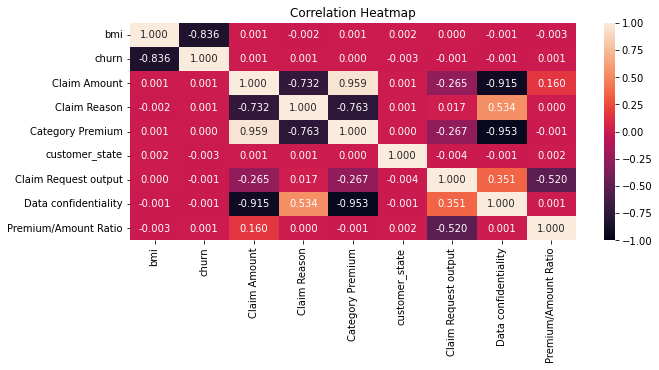

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize = (10,4))
plt.title("Correlation Heatmap")
sns.heatmap(df.corr(),vmin=-1,vmax=1,annot=True,fmt='.3f')
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
xtra,xtes,ytra,ytes = train_test_split(df.drop("churn", axis = 1),df["churn"], test_size = 0.2,
                                      random_state = 404)

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


rf = RandomForestClassifier(random_state = 404)

param_grid = { 
    'n_estimators': [10,20,30],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [23]:
CV_rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
CV_rfc.fit(xtra,ytra)

C:\Users\ethan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ethan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ethan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

C:\Users\ethan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ethan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ethan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

C:\Users\ethan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ethan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ethan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

C:\Users\ethan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ethan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ethan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

C:\Users\ethan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ethan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ethan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

C:\Users\ethan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ethan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ethan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

C:\Users\ethan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ethan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ethan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=404),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 20, 30]})

In [24]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 10}

In [25]:
# yall MUST change here

In [26]:
rfm = RandomForestClassifier(criterion = "gini", max_depth = 4,
                             max_features = "auto", n_estimators = 10,
                             random_state = 404)

rfm.fit(xtra,ytra)

C:\Users\ethan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=4, max_features='auto', n_estimators=10,
                       random_state=404)

In [27]:
from sklearn.metrics import confusion_matrix, classification_report

y_train_preds = rfm.predict(xtra)
y_test_preds = rfm.predict(xtes)

In [28]:
print(classification_report(ytes, y_test_preds))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     14674
         1.0       1.00      1.00      1.00     25326

    accuracy                           1.00     40000
   macro avg       1.00      1.00      1.00     40000
weighted avg       1.00      1.00      1.00     40000



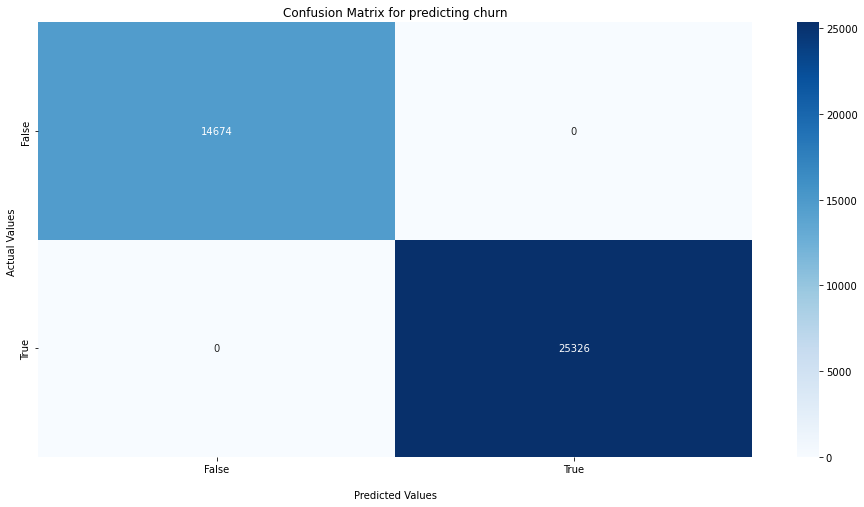

In [29]:
cf_matrix = confusion_matrix(ytes, y_test_preds)

import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (16,8))

sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g', ax=ax)

ax.set_title('Confusion Matrix for predicting churn');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [30]:
from sklearn import tree


dt = tree.DecisionTreeClassifier(max_depth = 2)

param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10,15], "min_samples_split" : [2, 4, 10, 12, 16], 'max_depth' : [2,3,4,5,6,7,8]}

gs = GridSearchCV(dt, param_grid=param_grid, scoring='accuracy', cv= 10, n_jobs=-1)
# cv: number of partitions for cross validation
# n_jobs: number of jobs to run in parallel, -1 means using all processors

gs = gs.fit(xtra, ytra) # 

print(gs.best_score_)
print(gs.best_params_)

1.0
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
